# 생활폐기물 : 최근 (2014~2018) 데이터를 이용해서 발생량 및 처리 현황 시각화

In [1]:
import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm

In [2]:
sns.set_style("whitegrid")

font_location = "C:\Windows\Fonts/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc("font", family=font_name)
mpl.rcParams["font.family"]
mpl.matplotlib_fname()

'C:\\Users\\Jisoo\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

## 1. 생활폐기물 data 생성 함수 (Amount, Disposal, Plastic)

In [3]:
class Read_trash_data:
    def __init__(self, data):
        self.original_trash_2014 = pd.read_csv("2014_{}_Data.csv".format(data))
        self.original_trash_2015 = pd.read_csv("2015_{}_Data.csv".format(data))
        self.original_trash_2016 = pd.read_csv("2016_{}_Data.csv".format(data))
        self.original_trash_2017 = pd.read_csv("2017_{}_Data.csv".format(data))
        self.original_trash_2018 = pd.read_csv("2018_{}_Data.csv".format(data))

## 2. 연도별 전국, 서울, 대구 생활 폐기물 배출량 data 및 시각화 (종량제, 재활용)

In [499]:
class Volume_of_garbage(Read_trash_data):
    
    ## 생활폐기물 data 생성 class 상속
    def __init__(self, data):
        super().__init__(data)
        
    
    ## 연도별 / 전국(num=0), 서울(num=1), 대구(num=27) 별로 총 생활 폐기물 data 만 뽑아내기
    def volumn_of_garbage(self, num):                
        ### 종량제_총계 + 재활용_총계 + 음식물류_폐기물 = 생활 폐기물 총계
        self.trash_2014 = self.original_trash_2014[["종량제_총계", "재활용_총계", "음식물류_폐기물_분리배출"]].loc[num]
        self.trash_2015 = self.original_trash_2015[["종량제_총계", "재활용_총계", "음식물류_폐기물_분리배출"]].loc[num]
        self.trash_2016 = self.original_trash_2016[["종량제_총계", "재활용_총계", "음식물류_폐기물_분리배출"]].loc[num]
        self.trash_2017 = self.original_trash_2017[["종량제_총계", "재활용_총계", "음식물류_폐기물_분리배출"]].loc[num]
        self.trash_2018 = self.original_trash_2018[["종량제_총계", "재활용_총계", "음식물류_폐기물_분리배출"]].loc[num]
        
        garbage_bag = [self.trash_2014.values[0], self.trash_2015.values[0], 
                           self.trash_2016.values[0], self.trash_2017.values[0], self.trash_2018.values[0]]
        recyclable_waste = [self.trash_2014.values[1], self.trash_2015.values[1], 
                           self.trash_2016.values[1], self.trash_2017.values[1], self.trash_2018.values[1]]
        food_waste = [self.trash_2014.values[2], self.trash_2015.values[2], 
                           self.trash_2016.values[2], self.trash_2017.values[2], self.trash_2018.values[2]]
        
        data = {"종량제_총계":garbage_bag, "재활용_총계":recyclable_waste, "음식물류_폐기물":food_waste, "연도":[2014, 2015, 2016, 2017, 2018]}
        self.volumn_of_garbage = pd.DataFrame(data)
        self.volumn_of_garbage.set_index("연도", inplace=True)
        
        return self.volumn_of_garbage
    
    
    ## 연도별 생활 폐기물 총 배출량을 비교 시각화
    def plt(self, name):
        index = self.volumn_of_garbage.index
        alpha = 0.5
        plt.figure(figsize=(16, 8))

        plt.barh(index, self.volumn_of_garbage.iloc[:,0], align ="center", color ='c', alpha=alpha)
        plt.barh(index, self.volumn_of_garbage.iloc[:,1], left=self.volumn_of_garbage.iloc[:,0], align ="center", color = 'b', alpha=alpha)
        plt.barh(index, self.volumn_of_garbage.iloc[:,2], left=self.volumn_of_garbage.iloc[:,0]+self.volumn_of_garbage.iloc[:,1],
                 align ="center", color = 'm', alpha=alpha)

        plt.title("{} 생활 폐기물 배출 총량".format(name), fontsize=25)
        plt.xlabel("톤/일", fontsize=18)
        plt.ylabel("Year", fontsize=18)
        plt.yticks(index, fontsize=15)
        plt.grid(False)
        plt.legend(self.volumn_of_garbage.columns, loc="lower right")
        #plt.savefig("{} 생활 폐기물 배출 총량 연도별 비교.jpg".format(name), bbox_inches='tight')
        plt.tight_layout()
        plt.show()

### 1) 전국 생활 폐기물 총 배출량

In [500]:
total_amount = Volume_of_garbage("Final_Trash_Amount")

In [501]:
total_amount.volumn_of_garbage(0)

,종량제_총계,재활용_총계,음식물류_폐기물
연도,,,
2014,22264.6,14428.7,13221.5
2015,23170.3,13857.0,14219.5
2016,24965.5,14417.7,14388.7
2017,24638.4,14451.2,14399.9
2018,25572.4,15985.8,14477.2


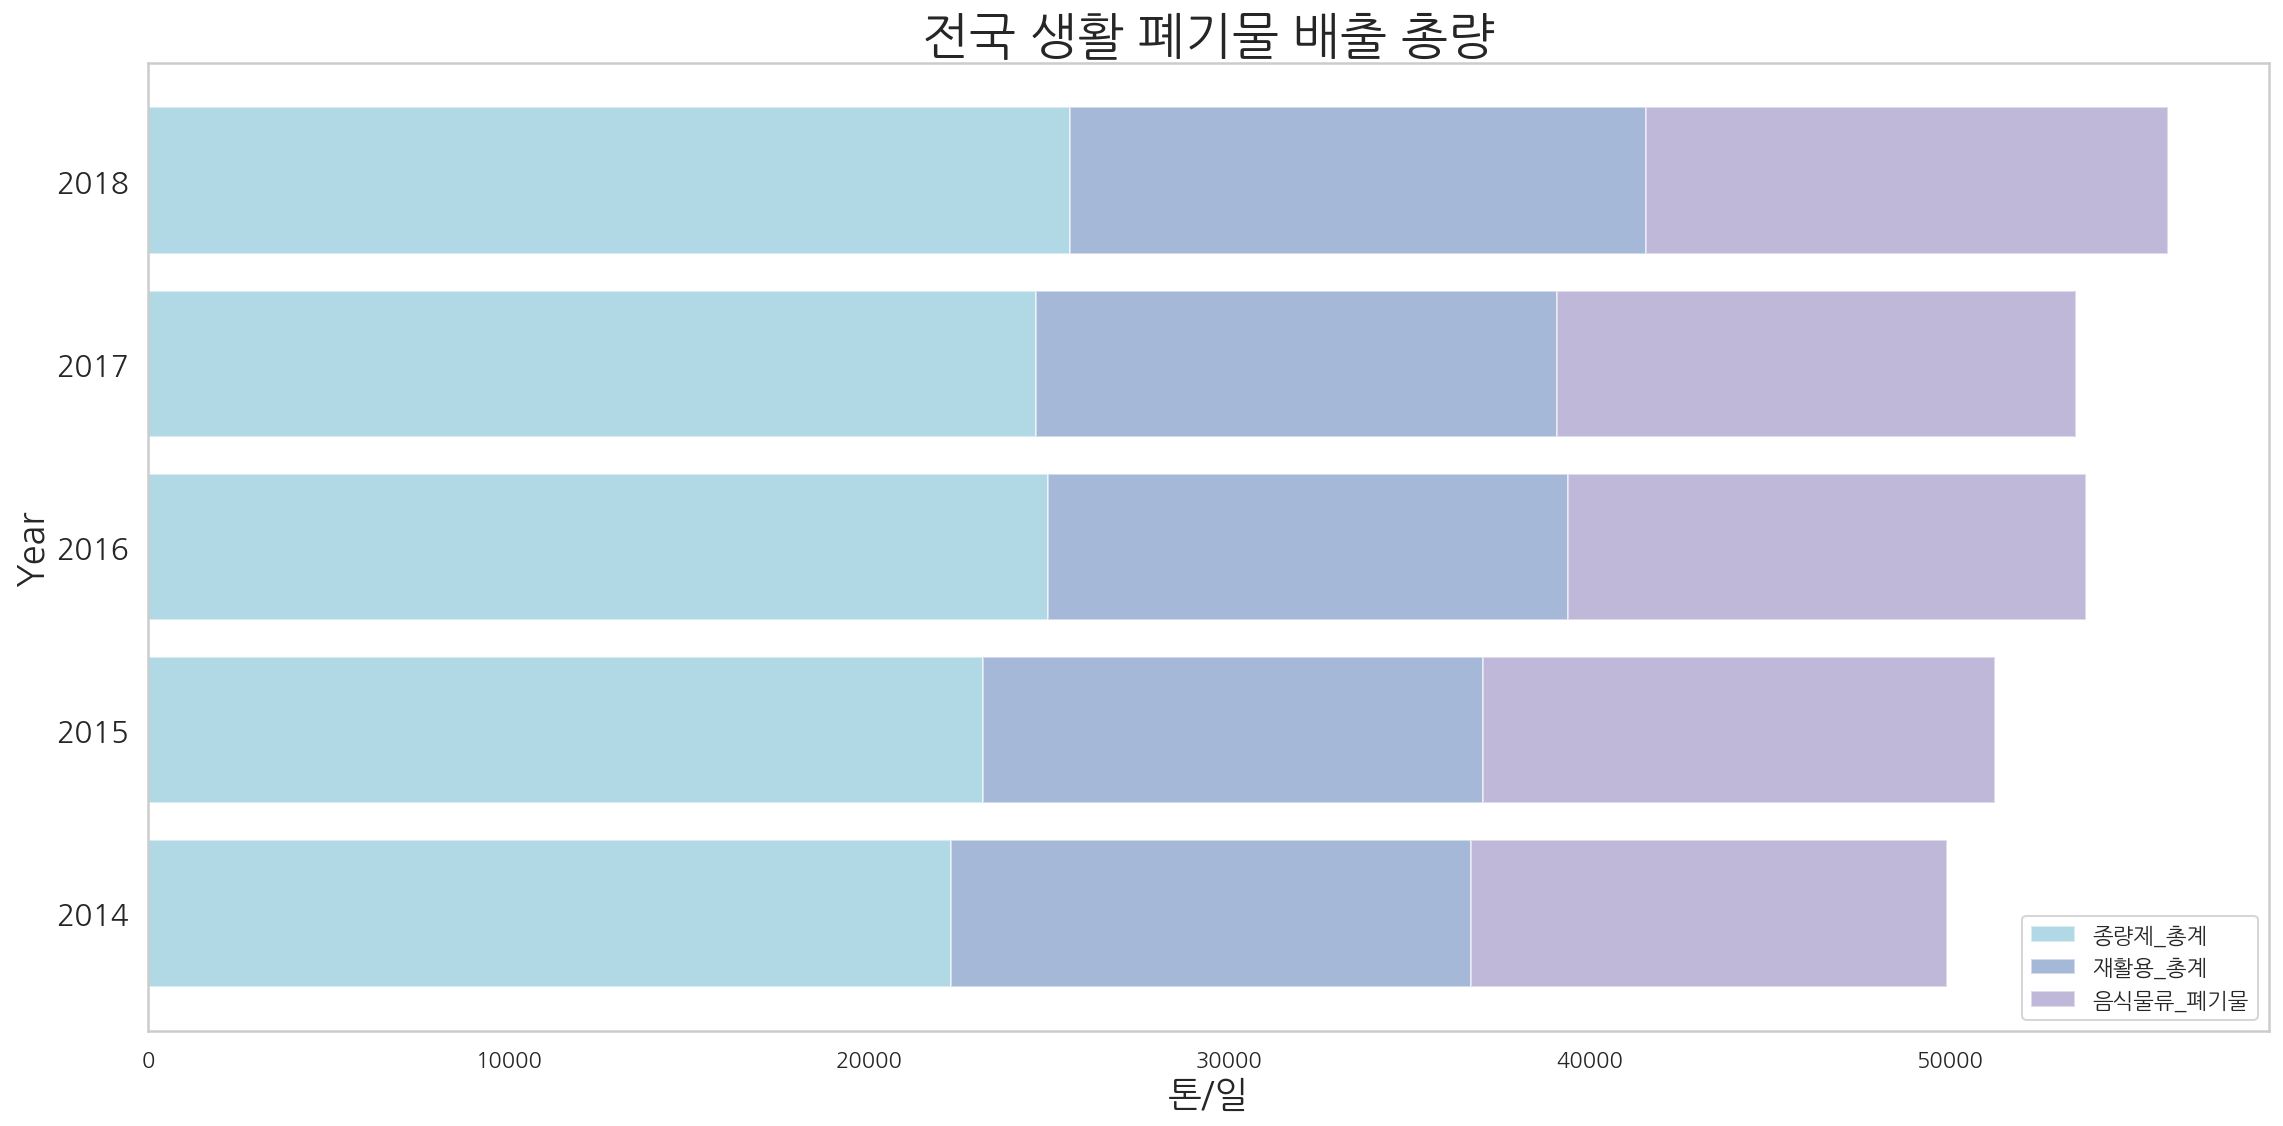

In [502]:
total_amount.plt("전국")

### 2) 서울 생활 폐기물 총 배출량

In [393]:
seoul_amount = Volume_of_garbage("Final_Trash_Amount")

In [394]:
seoul_amount.volumn_of_garbage(1)

,종량제_총계,재활용_총계,음식물류_폐기물
연도,,,
2014,3206.1,3226.7,3181.0
2015,2963.6,3309.3,3165.8
2016,3089.6,3443.0,3075.4
2017,3067.0,3278.6,2871.7
2018,3075.2,3598.9,2818.8


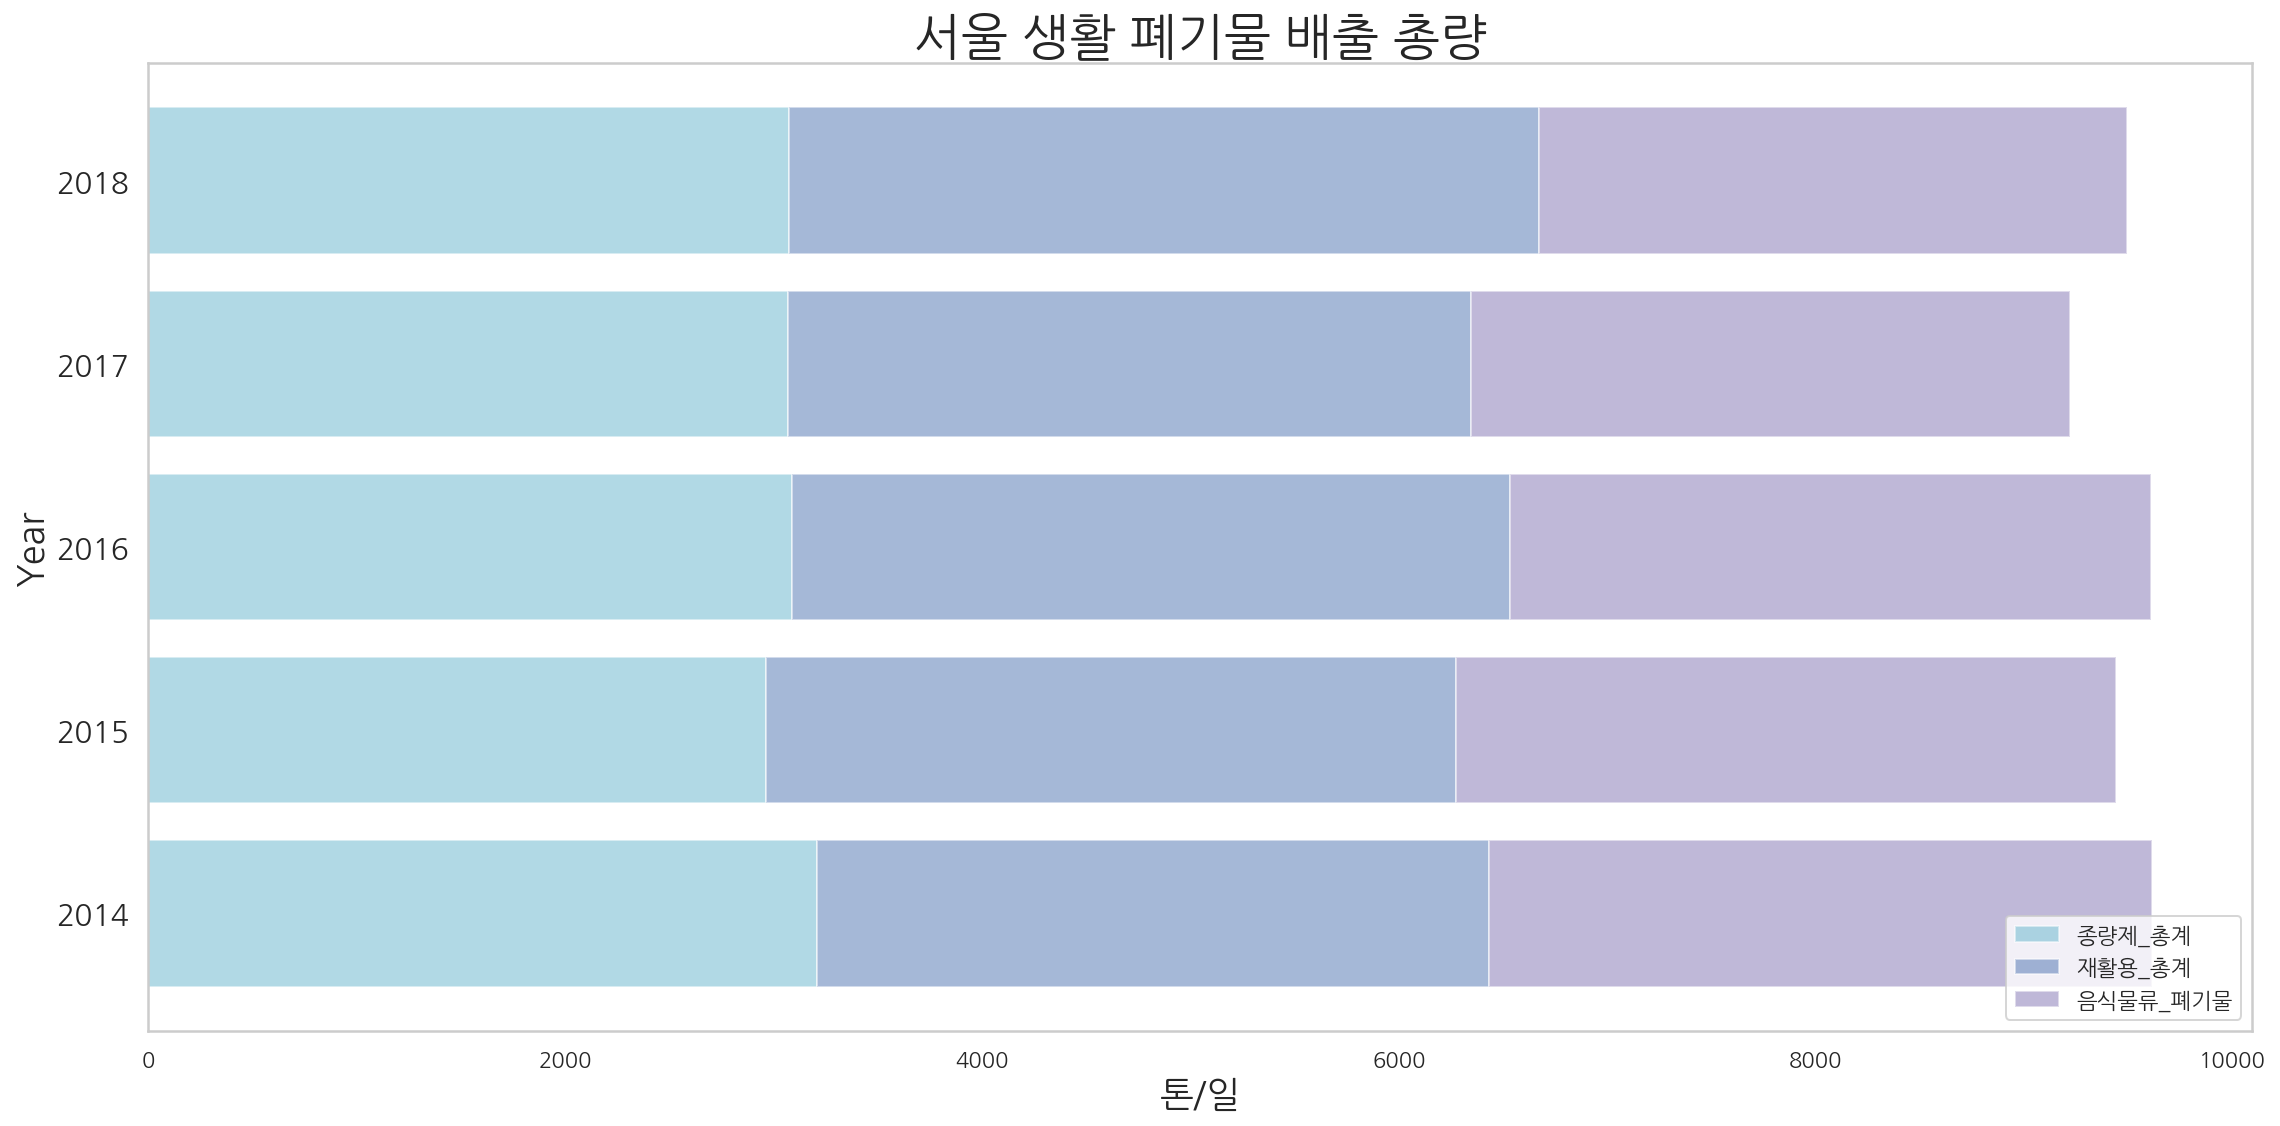

In [395]:
seoul_amount.plt("서울")

### 3) 대구 생활 폐기물 총 배출량

In [396]:
daegu_amount = Volume_of_garbage("Final_Trash_Amount")

In [397]:
daegu_amount.volumn_of_garbage(27)

,종량제_총계,재활용_총계,음식물류_폐기물
연도,,,
2014,1450.7,832.6,616.1
2015,1528.4,812.1,626.0
2016,1476.0,796.2,684.7
2017,1418.6,801.6,675.2
2018,1424.6,904.6,685.6


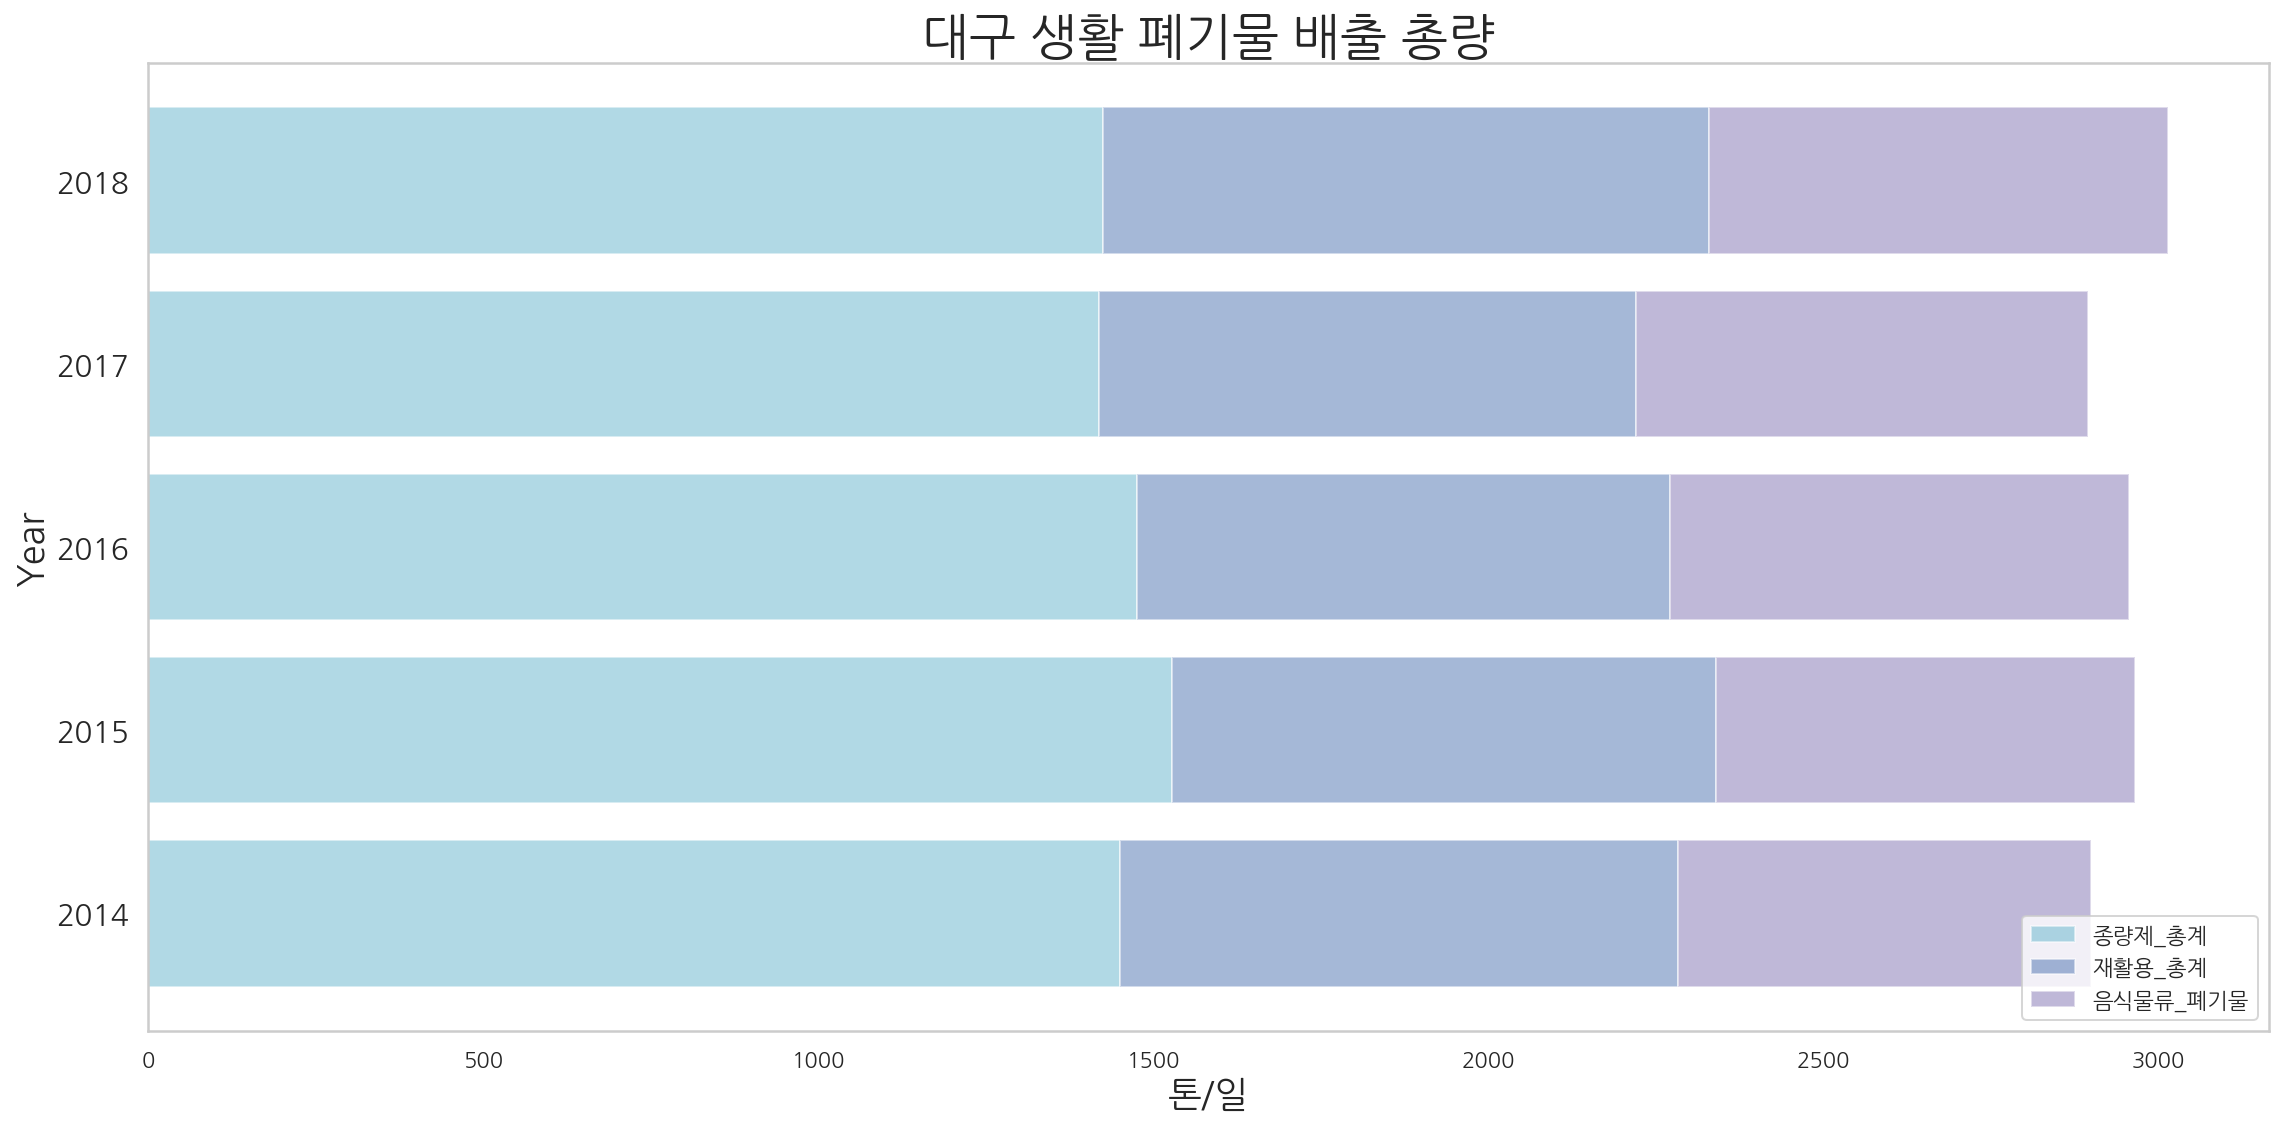

In [398]:
daegu_amount.plt("대구")

## 3. 연도별 전국, 서울, 대구 (생활)폐플라스틱 배출량 data 및 시각화

In [116]:
class Plastic_volume_of_garbage(Read_trash_data):
    
    ## 생활폐기물 data 생성 class 상속
    def __init__(self, data):
        super().__init__(data)
        
    
    ## 연도별 / 전국(num=0), 서울(num=1), 대구(num=27) 별로 총 폐플라스틱 data 만 뽑아내기
    def plastic_volumn_of_garbage(self, num):                
        
        self.trash_2014 = self.original_trash_2014[["지역별_플라스틱_총계","지역별_플라스틱 비중(%)"]].loc[num]
        self.trash_2015 = self.original_trash_2015[["지역별_플라스틱_총계","지역별_플라스틱 비중(%)"]].loc[num]
        self.trash_2016 = self.original_trash_2016[["지역별_플라스틱_총계","지역별_플라스틱 비중(%)"]].loc[num]
        self.trash_2017 = self.original_trash_2017[["지역별_플라스틱_총계","지역별_플라스틱 비중(%)"]].loc[num]
        self.trash_2018 = self.original_trash_2018[["지역별_플라스틱_총계","지역별_플라스틱 비중(%)"]].loc[num]
        
        plastic_sum = [self.trash_2014.values[0], self.trash_2015.values[0], 
                           self.trash_2016.values[0], self.trash_2017.values[0], self.trash_2018.values[0]]
        plastic_percentage = [self.trash_2014.values[1], self.trash_2015.values[1], 
                           self.trash_2016.values[1], self.trash_2017.values[1], self.trash_2018.values[1]]
    
        data = {"플라스틱_총계":plastic_sum, "플라스틱_배출량 비중":plastic_percentage, "연도":[2014, 2015, 2016, 2017, 2018]}
        self.plastic_volumn_of_garbage = pd.DataFrame(data)
        self.plastic_volumn_of_garbage.set_index("연도", inplace=True)
        
        return self.plastic_volumn_of_garbage
    
   
    ## 연도별 폐플라스틱 총 배출량 및 비중 증감량 시각화
    def plastic_plt(self, name):
        alpha = 0.5
        plt.figure(figsize=(16,8))

        total = self.plastic_volumn_of_garbage["플라스틱_총계"].plot(kind="bar", color="r", alpha=alpha)
        percentage = total.twinx()
        percentage.plot(total.get_xticks(), self.plastic_volumn_of_garbage["플라스틱_배출량 비중"], linestyle='-', 
                        marker='o', linewidth=5.0, color="b", alpha=alpha)

        plt.title("{} 폐플라스틱 배출량".format(name), fontsize=25)
        total.set_xlabel("Year", fontsize=18)
        total.set_ylabel("배출량(톤/일)", fontsize=18)
        plt.ylabel("폐플라스틱 비중(%)", fontsize=18)
        plt.ylim((6. , 14.6)) # 폐플라스틱 비중을 전국, 서울, 대구별로 비교하기 위해 범위를 고정
        total.set_ylim((0, 7000)) # 폐플라스틱 총량을 전국, 서울, 대구별로 비교하기 위해 범위를 고정
        #plt.xticks(self.plastic_volumn_of_garbage.index, fontsize=15)

        #ax = plt.subplot()
        #total.set_xticks([0, 1, 2, 3, 4, 5])
        #total.set_xticklabels(["2014", "2015", "2016", "2017", "2018"])
    
    
        total.grid(False)
        percentage.grid(False)
        total.legend()
        #plt.legend(handles=ax2, labels="a")
        #plt.savefig("{} 폐플라스틱 배출 총량 연도별 비교.jpg".format(name), bbox_inches='tight')
        plt.tight_layout()

        plt.show()

### 1) 전국 (생활)폐플라스틱 폐기물 총 배출량

In [117]:
total_plastic = Plastic_volume_of_garbage("Final_Trash_Amount")

In [118]:
total_plastic.plastic_volumn_of_garbage(0)

,플라스틱_총계,플라스틱_배출량 비중
연도,,
2014,4606.76,9.229247
2015,4938.60,9.636894
2016,5445.60,10.127223
2017,5852.30,10.941026
2018,6375.10,11.376915


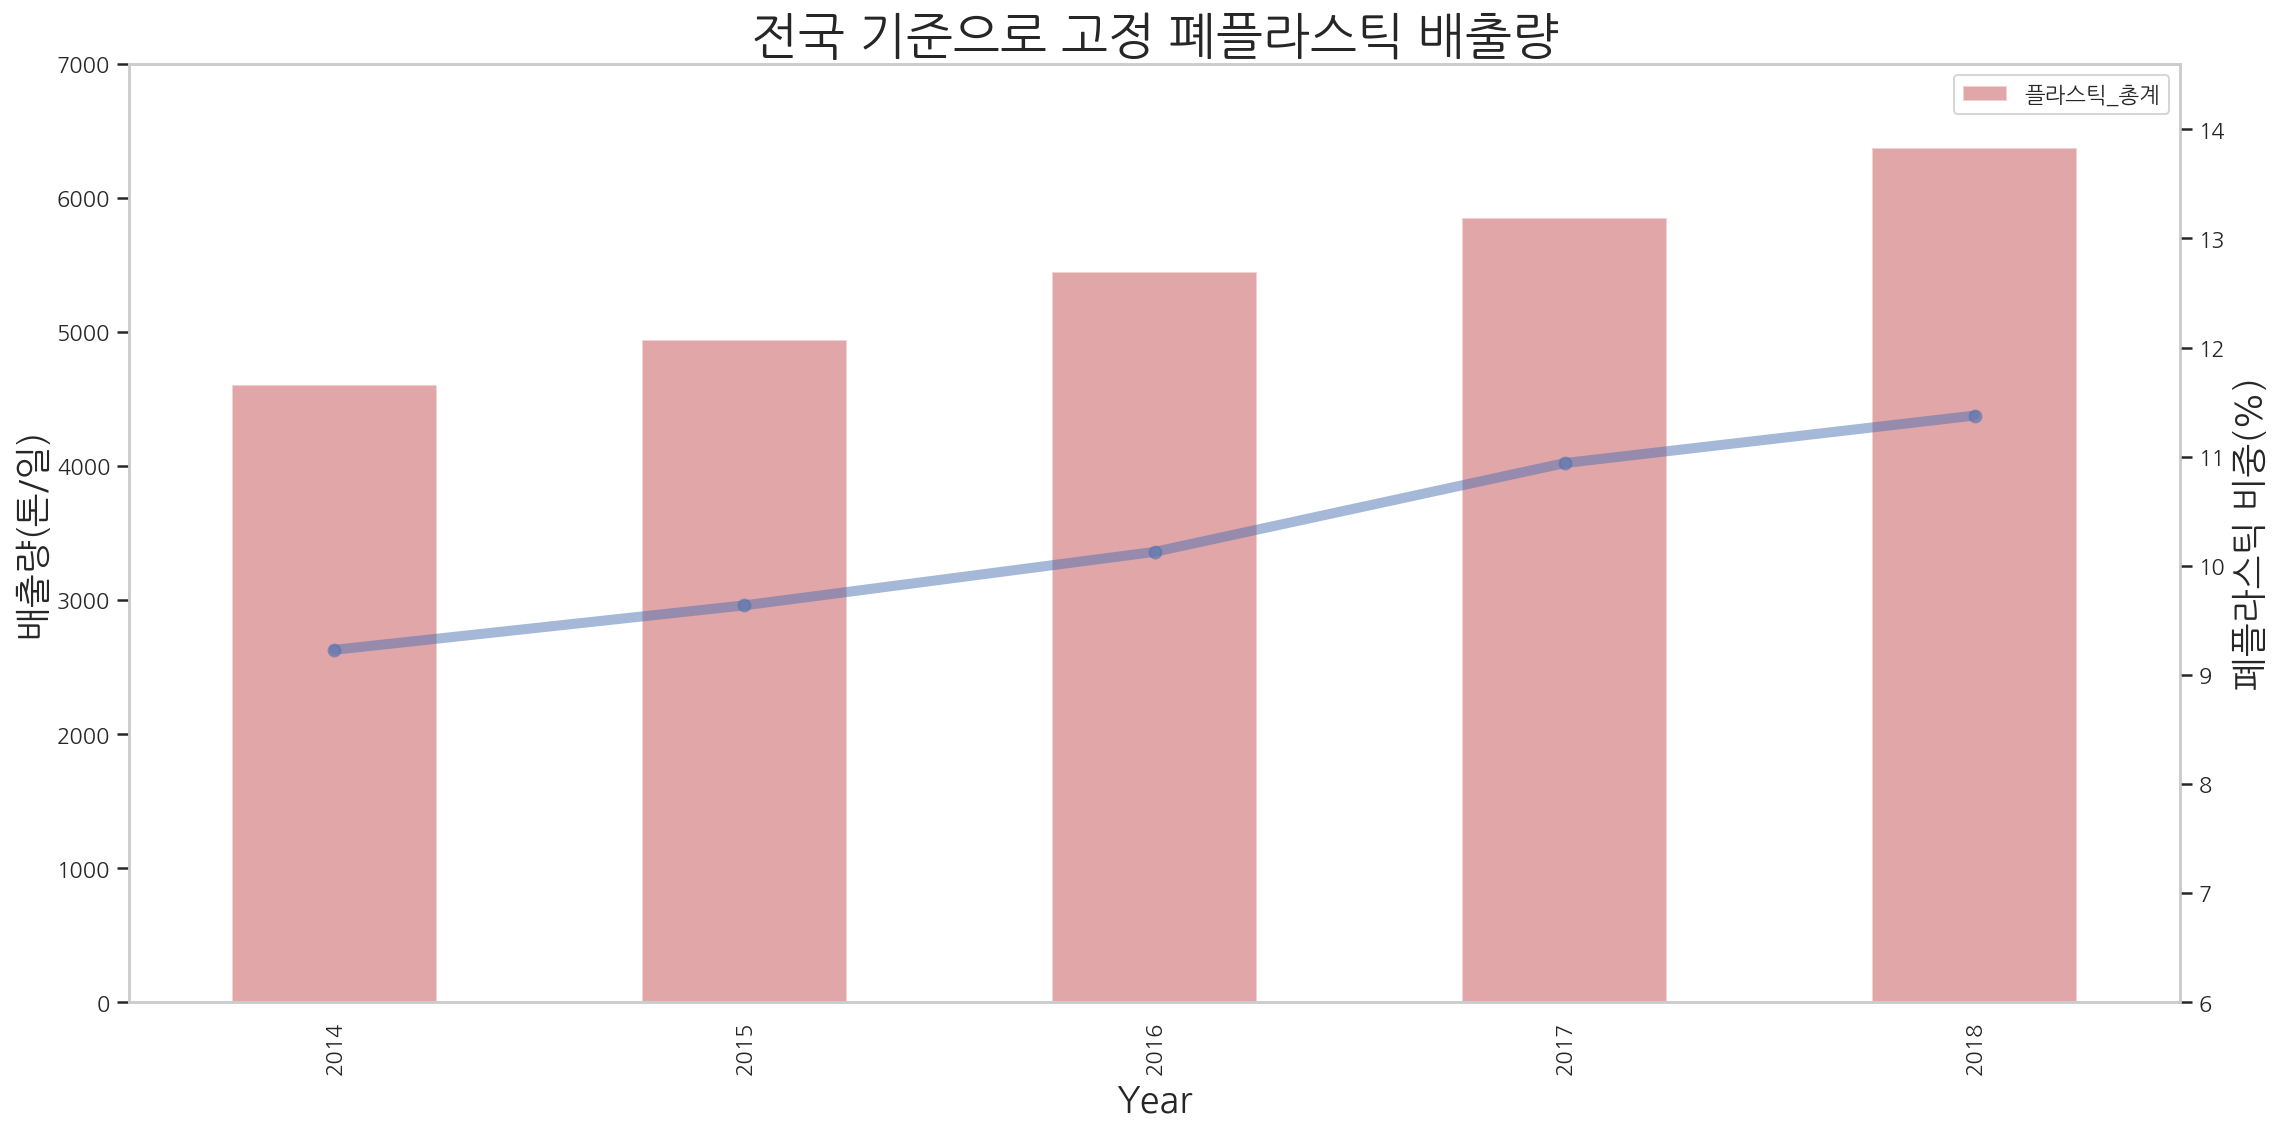

In [119]:
total_plastic.plastic_plt("전국 기준으로 고정")

### 2) 서울 (생활)폐플라스틱 폐기물 총 배출량

In [596]:
seoul_plastic = Plastic_volume_of_garbage("Final_Trash_Amount")

In [597]:
seoul_plastic.plastic_volumn_of_garbage(1)

,플라스틱_총계,플라스틱_배출량 비중
연도,,
2014,581.8,6.051717
2015,616.3,6.529501
2016,658.8,6.856786
2017,843.9,9.155610
2018,748.4,7.883787


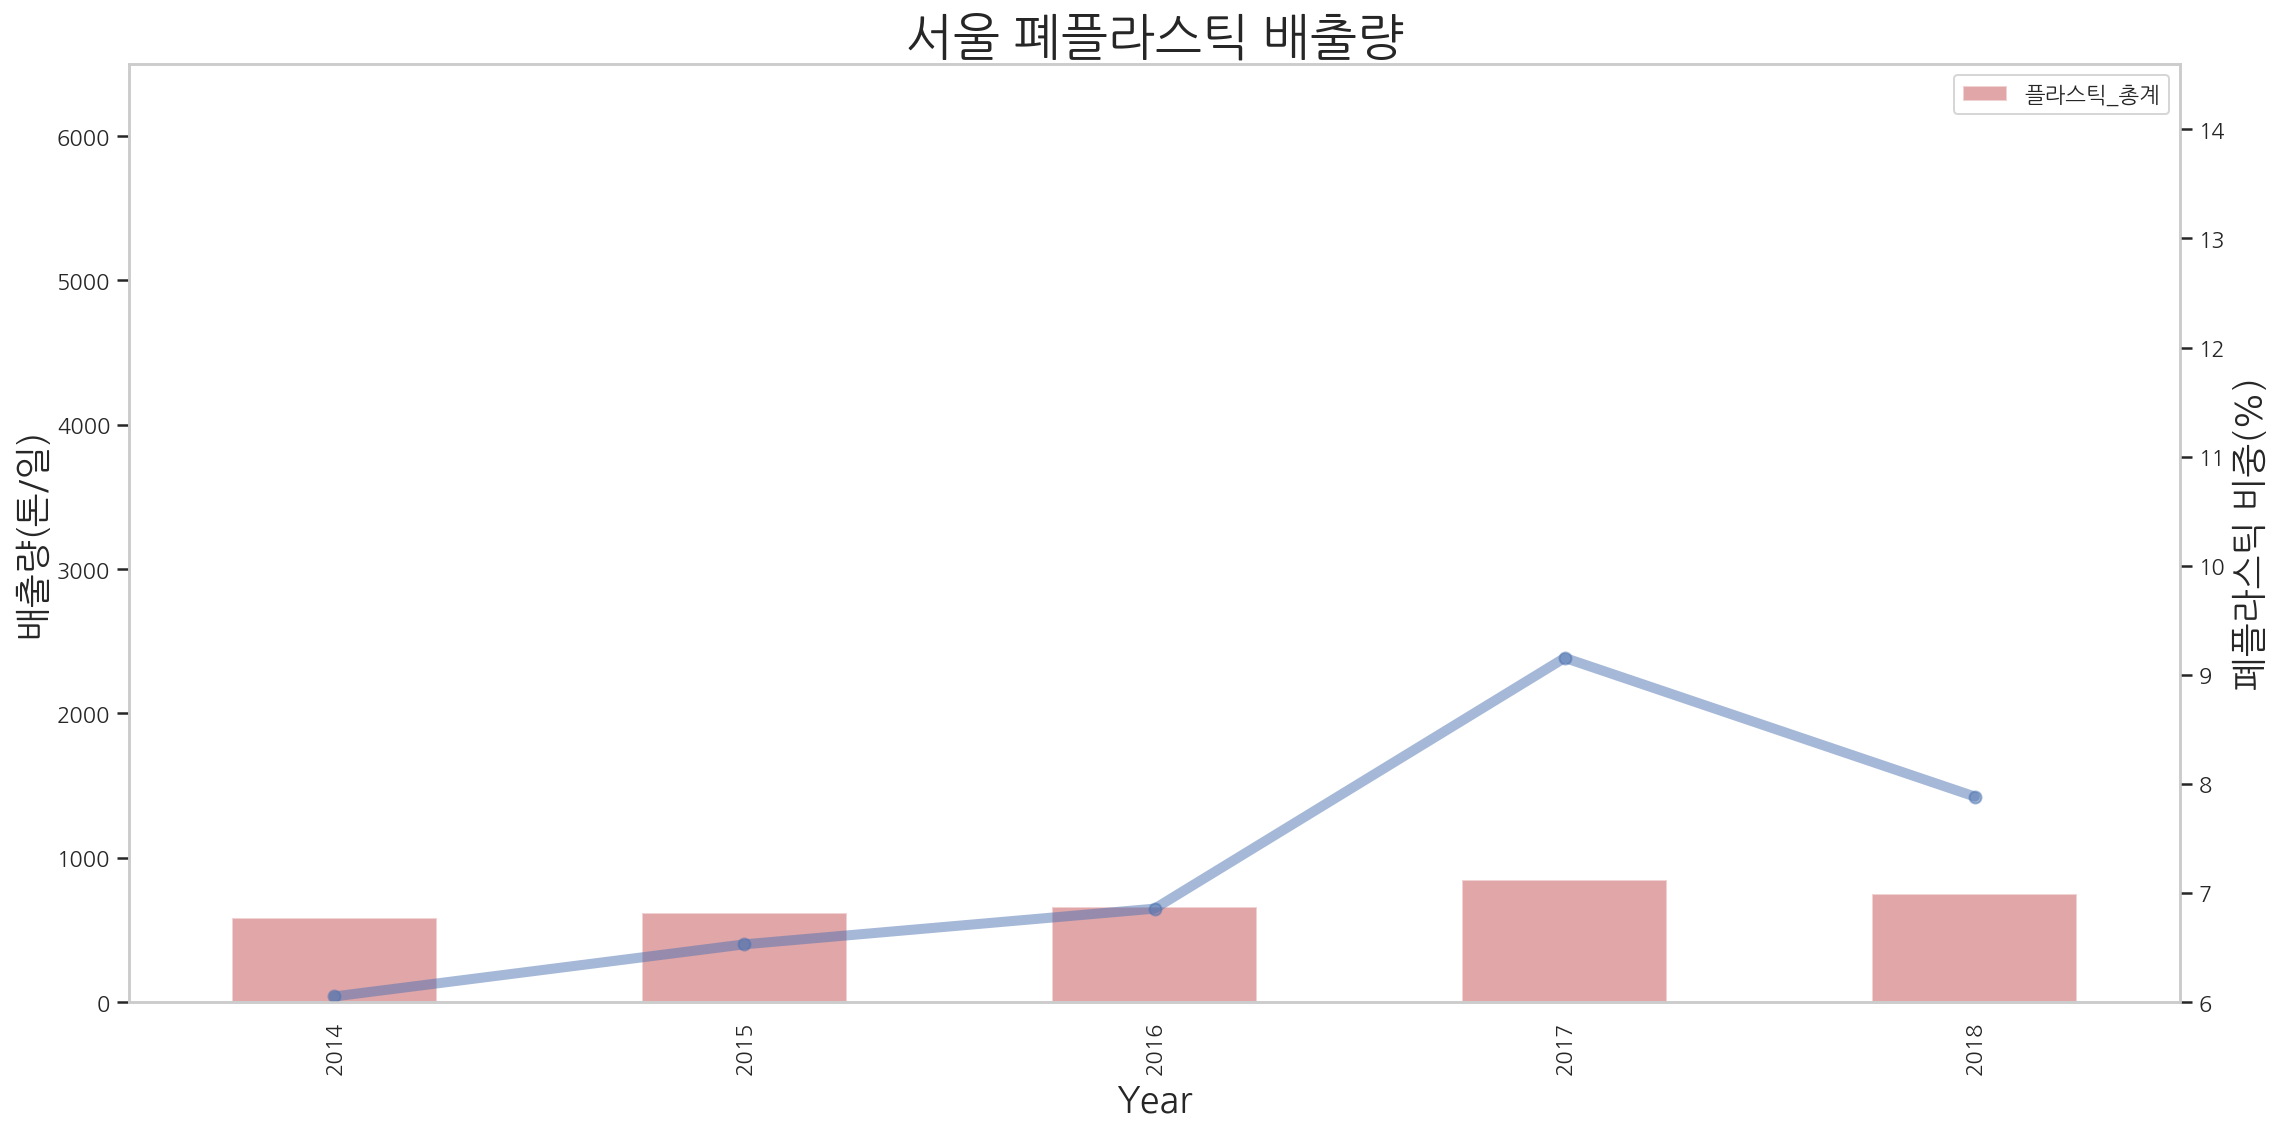

In [598]:
seoul_plastic.plastic_plt("서울")

### 3) 대구 (생활)폐플라스틱 폐기물 총 배출량

In [599]:
daegu_plastic = Plastic_volume_of_garbage("Final_Trash_Amount")

In [600]:
daegu_plastic.plastic_volumn_of_garbage(27)

,플라스틱_총계,플라스틱_배출량 비중
연도,,
2014,319.56,11.021591
2015,371.60,12.526546
2016,414.00,14.001150
2017,398.60,13.766664
2018,393.10,13.039008


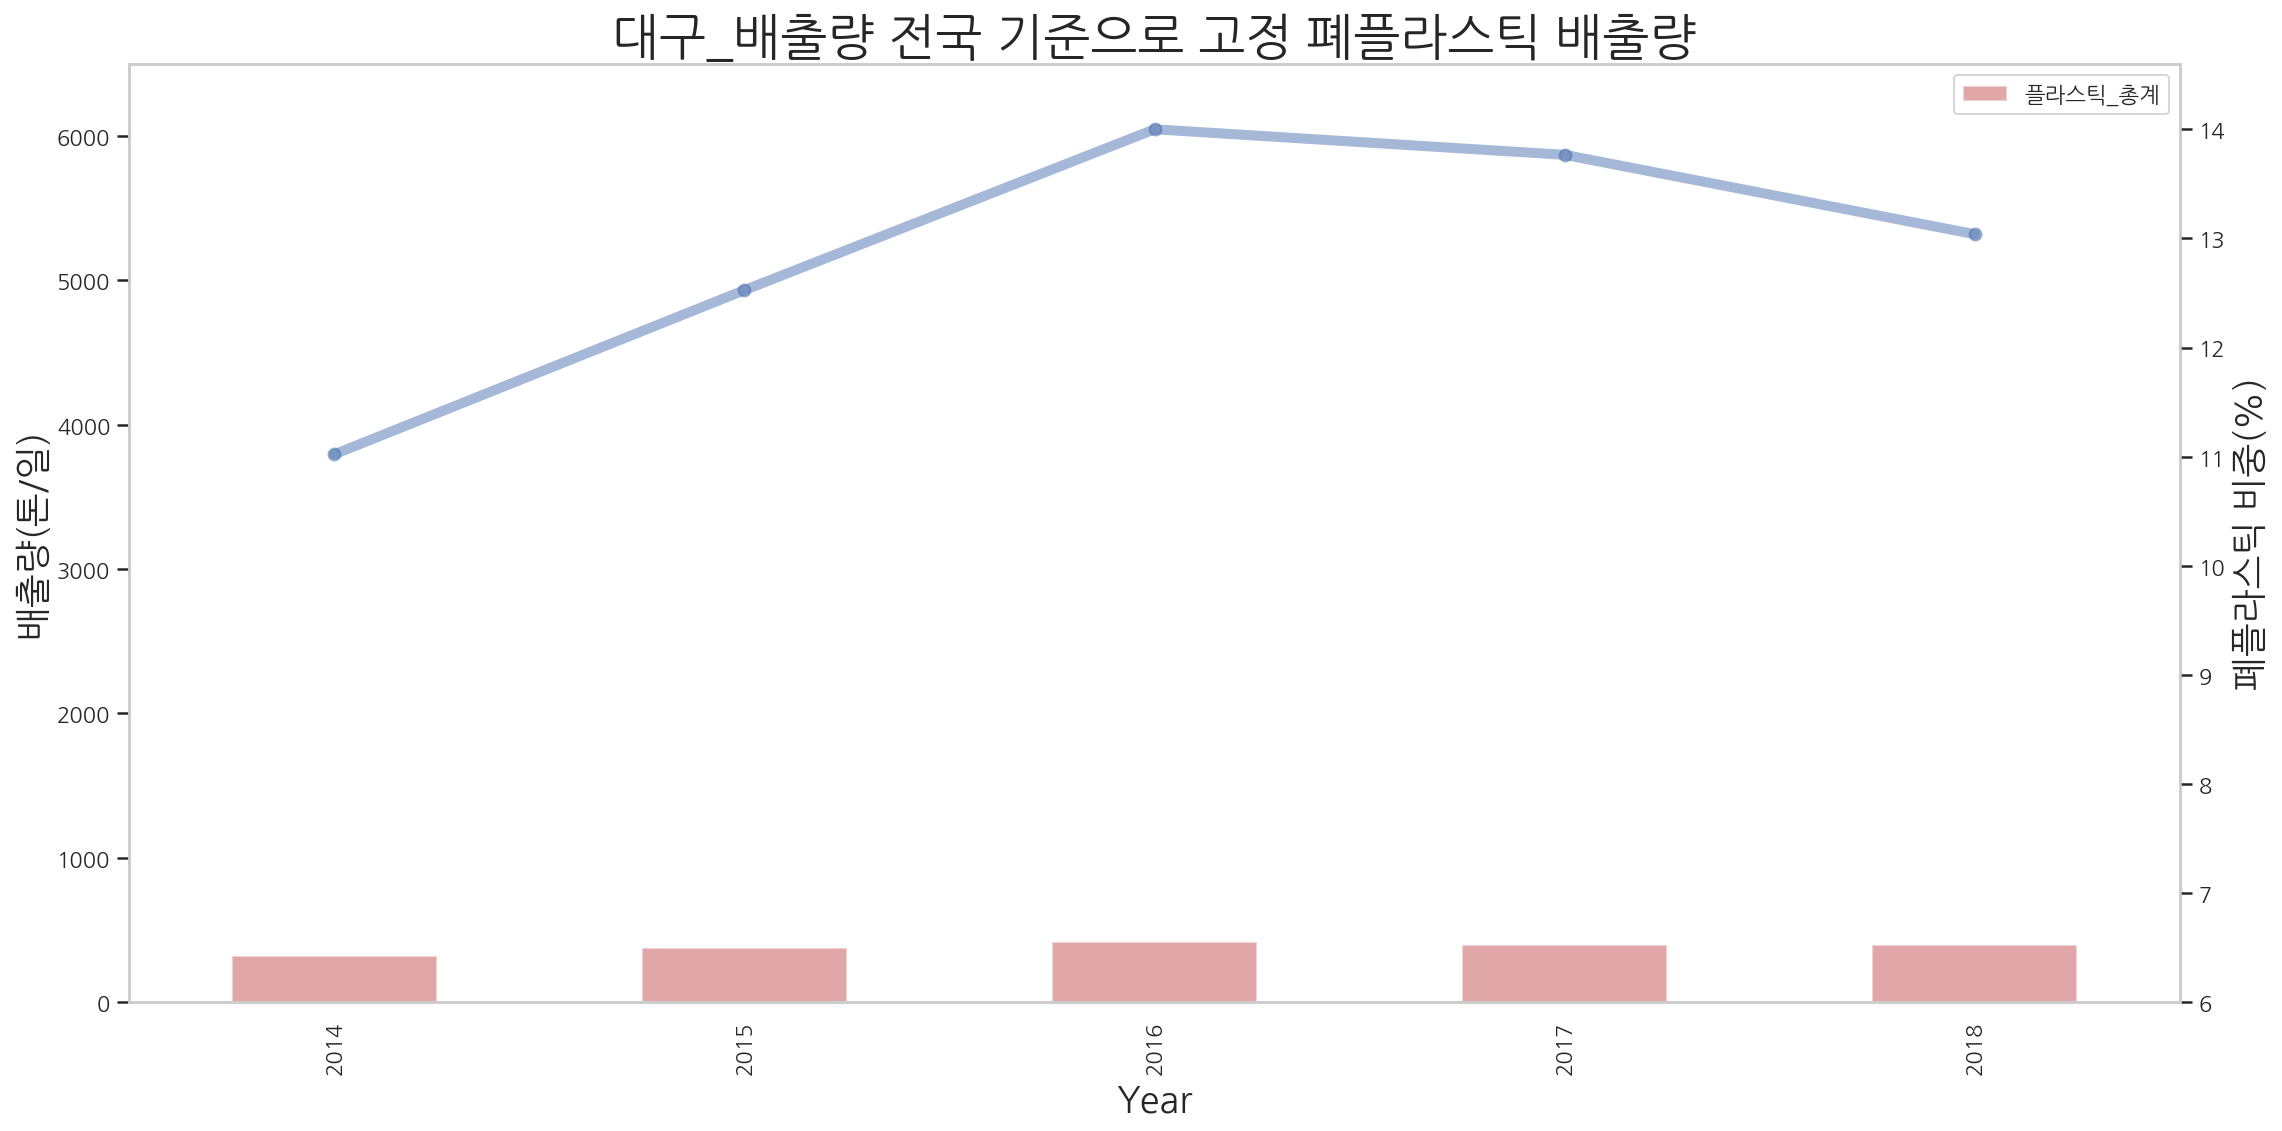

In [601]:
daegu_plastic.plastic_plt("대구_배출량 전국 기준으로 고정")

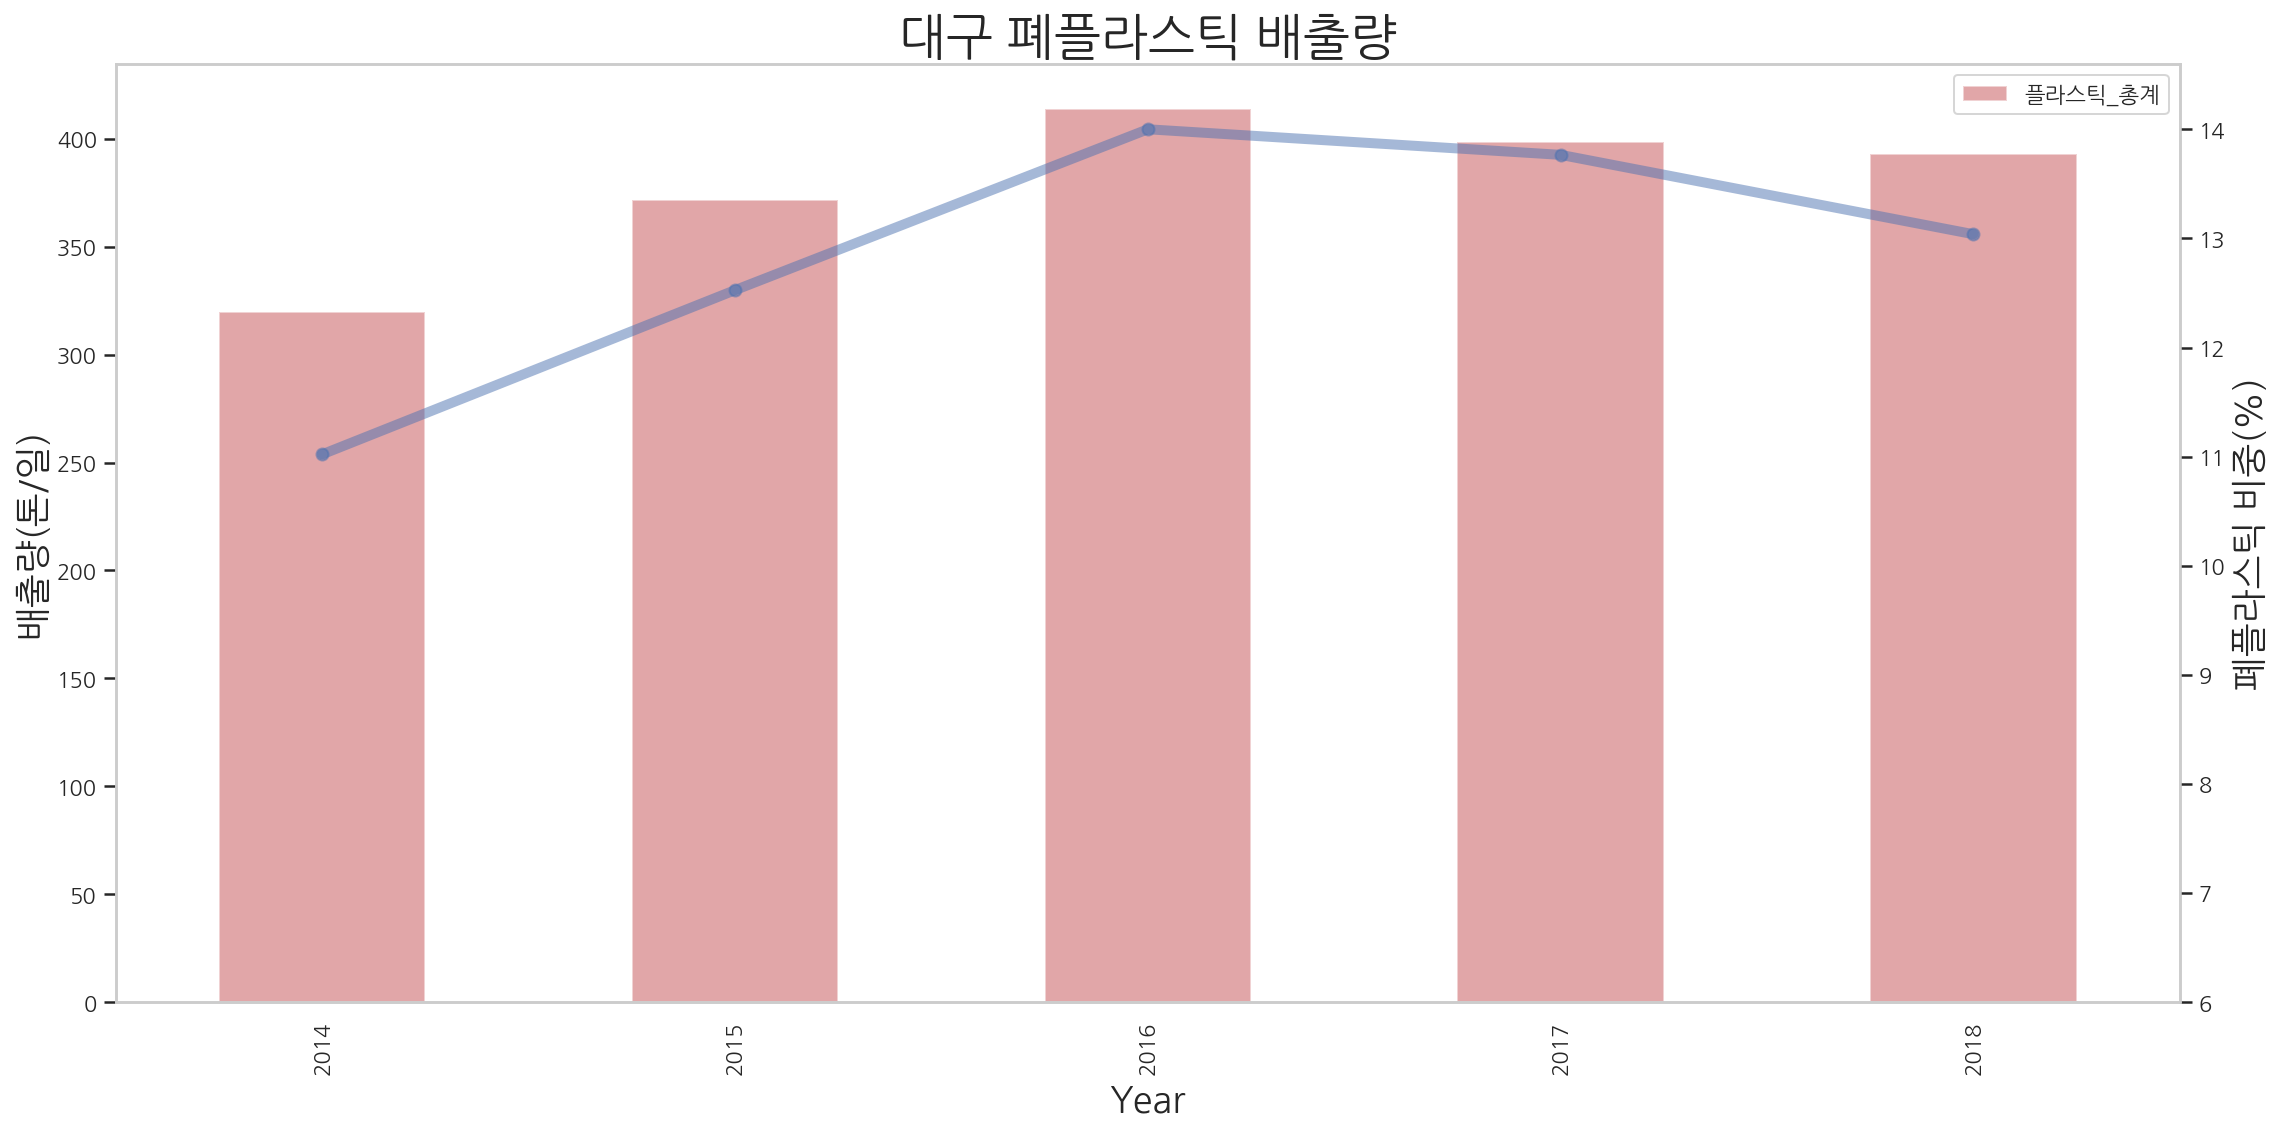

In [579]:
daegu_plastic.plastic_plt("대구")

## 3. 생활 폐기물 처리 현황 data 및 시각화
- 연도별, 전국, 서울, 대구 생활 폐기물 처리현황 (매립, 소각, 재활용) data 및 시각화
- 연도별, 전국, 서울, 대구 생활 폐기물 재활용 현황 (재활용 비중) data 및 시각화

In [6]:
test = Read_trash_data("Final_Disposal")

In [7]:
test.original_trash_2014

,시도,시군구,처리량_합계,매립,소각,재활용,재활용 비중(%)
0,전국,합계,49914.8,7813.1,12647.5,29454.2,59.008951
1,서울,소계,9613.8,926.6,2263.3,6423.9,66.819572
2,서울,종로구,365.4,34.1,103.9,227.4,62.233169
3,서울,중구,504.5,19.4,168.0,317.1,62.854311
4,서울,용산구,273.0,8.8,86.9,177.3,64.945055
5,서울,성동구,254.1,20.9,67.8,165.4,65.092483
6,서울,광진구,348.9,34.1,60.2,254.6,72.972198
7,서울,동대문구,414.7,23.2,96.7,294.8,71.087533
8,서울,중랑구,369.4,23.6,83.8,262.0,70.925826
9,서울,성북구,366.6,24.4,96.6,245.6,66.993999


In [10]:
a = test.original_trash_2014[["매립", "소각", "재활용"]].loc[0]
b = test.original_trash_2015[["매립", "소각", "재활용"]].loc[0]
c = test.original_trash_2016[["매립", "소각", "재활용"]].loc[0]
d = test.original_trash_2017[["매립", "소각", "재활용"]].loc[0]
e = test.original_trash_2018[["매립", "소각", "재활용"]].loc[0]

In [13]:
f = [a.values[0], b.values[0], c.values[0], d.values[0], e.values[0]]
g = [a.values[1], b.values[1], c.values[1], d.values[1], e.values[1]]
h = [a.values[2], b.values[2], c.values[2], d.values[2], e.values[2]]

In [14]:
dt = {"매립":f, "소각":g, "재활용":h}
df = pd.DataFrame(dt)
df

,매립,소각,재활용
0,7813.1,12647.5,29454.2
1,7719.1,13175.5,30352.2
2,7909.2,13609.8,32252.9
3,7240.0,13318.1,32931.4
4,7525.4,13762.9,34747.1


In [133]:
class Waste_disposal(Read_trash_data):
    
    ## 생활폐기물 data 생성 class 상속
    def __init__(self, data):
        super().__init__(data)
        
        
    ## 연도별 / 전국(num=0), 서울(num=1), 대구(num=27) 별로 총 생활 폐기물 처리 방법(매립, 소각, 재활용) data 만 뽑아내기
    def disposal_data(self, num):                
        ### 폐기물 처리방법은 매립, 소각, 재활용 으로 3가지이다. 
        self.trash_2014 = self.original_trash_2014[["매립", "소각", "재활용"]].loc[num]
        self.trash_2015 = self.original_trash_2015[["매립", "소각", "재활용"]].loc[num]
        self.trash_2016 = self.original_trash_2016[["매립", "소각", "재활용"]].loc[num]
        self.trash_2017 = self.original_trash_2017[["매립", "소각", "재활용"]].loc[num]
        self.trash_2018 = self.original_trash_2018[["매립", "소각", "재활용"]].loc[num]
        
        landfill = [self.trash_2014.values[0], self.trash_2015.values[0], 
                           self.trash_2016.values[0], self.trash_2017.values[0], self.trash_2018.values[0]]
        incineration = [self.trash_2014.values[1], self.trash_2015.values[1], 
                           self.trash_2016.values[1], self.trash_2017.values[1], self.trash_2018.values[1]]
        recyclable_waste = [self.trash_2014.values[2], self.trash_2015.values[2], 
                           self.trash_2016.values[2], self.trash_2017.values[2], self.trash_2018.values[2]]
        
        data = {"매립":landfill, "소각":incineration, "재활용":recyclable_waste, "연도":[2014, 2015, 2016, 2017, 2018]}
        self.disposal_df = pd.DataFrame(data)
        self.disposal_df.set_index("연도", inplace=True)
        
        return self.disposal_df
    

    ## 연도별 / 전국(num=0), 서울(num=1), 대구(num=27) 별로 총 생활 폐기물 처리량에서 재활용 폐기물 비중 data 만 뽑아내기
    def recycle_percentage(self, num):
        self.trash_2014 = self.original_trash_2014[["재활용", "재활용 비중(%)"]].loc[num]
        self.trash_2015 = self.original_trash_2015[["재활용", "재활용 비중(%)"]].loc[num]
        self.trash_2016 = self.original_trash_2016[["재활용", "재활용 비중(%)"]].loc[num]
        self.trash_2017 = self.original_trash_2017[["재활용", "재활용 비중(%)"]].loc[num]
        self.trash_2018 = self.original_trash_2018[["재활용", "재활용 비중(%)"]].loc[num]
        
        recycling_total = [self.trash_2014.values[0], self.trash_2015.values[0], 
                           self.trash_2016.values[0], self.trash_2017.values[0], self.trash_2018.values[0]]
        recycling_percentage = [self.trash_2014.values[1], self.trash_2015.values[1], 
                           self.trash_2016.values[1], self.trash_2017.values[1], self.trash_2018.values[1]]
        
        data = {"재활용":recycling_total, "재활용 비중(%)":recycling_percentage, "연도":[2014, 2015, 2016, 2017, 2018]}
        self.recycling_percentage_df = pd.DataFrame(data)
        self.recycling_percentage_df.set_index("연도", inplace=True)
        
        return self.recycling_percentage_df
    
    
    ## 연도별 총 생활 폐기물 처리방법을 비교 시각화
    def plt_disposal(self, name):
        index = self.disposal_df.index
        alpha = 0.5
        plt.figure(figsize=(16, 8))

        plt.bar([x*2 for x in range(len(index))], self.disposal_df.iloc[:,0], align ="center", color ='c', alpha=alpha)
        plt.bar([x*2+0.5 for x in range(len(index))], self.disposal_df.iloc[:,1], align ="center", color = 'b', alpha=alpha)
        plt.bar([x*2+1 for x in range(len(index))], self.disposal_df.iloc[:,2], align ="center", color = 'm', alpha=alpha)

        plt.title("{} 생활 폐기물 처리현황".format(name), fontsize=25)
        plt.ylabel("톤/일", fontsize=18)
        plt.xlabel("Year", fontsize=18)
        plt.xticks([x*2+0.5 for x in range(len(index))],index, fontsize=15)
        plt.grid(False)
        plt.legend(self.disposal_df.columns, loc="upper left")
        #plt.savefig("{} 생활 폐기물 배출 총량 연도별 비교.jpg".format(name), bbox_inches='tight')
        plt.tight_layout()
        plt.show()
        
    
    ## 연도별 생활 폐기물 처리현황 중 재활용 량과 재활용 비중 비교 시각화
    def plt_recycle(self, name):
        alpha = 0.5
        plt.figure(figsize=(16,8))

        total = self.recycling_percentage_df["재활용"].plot(kind="bar", color="r", alpha=alpha)
        percentage = total.twinx()
        percentage.plot(total.get_xticks(), self.recycling_percentage_df["재활용 비중(%)"], linestyle='-', 
                        marker='o', linewidth=5.0, color="b", alpha=alpha)

        plt.title("{} 재활용 처리량".format(name), fontsize=25)
        total.set_xlabel("Year", fontsize=18)
        total.set_ylabel("처리량(톤/일)", fontsize=18)
        plt.ylabel("재활용 비중(%)", fontsize=18)
        #plt.ylim((6. , 14.6)) # 폐플라스틱 비중을 전국, 서울, 대구별로 비교하기 위해 범위를 고정
        #total.set_ylim((0, 6500)) # 폐플라스틱 총량을 전국, 서울, 대구별로 비교하기 위해 범위를 고정

        total.grid(False)
        percentage.grid(False)
        total.legend()
        #plt.legend(handles=ax2, labels="a")
        #plt.savefig("{} 폐플라스틱 배출 총량 연도별 비교.jpg".format(name), bbox_inches='tight')
        plt.tight_layout()

        plt.show()

### 1) 전국 총 생활 폐기물 처리 현황

In [57]:
total_disposal = Waste_disposal("Final_Disposal")

In [58]:
total_disposal.disposal_data(0)

,매립,소각,재활용
연도,,,
2014,7813.1,12647.5,29454.2
2015,7719.1,13175.5,30352.2
2016,7909.2,13609.8,32252.9
2017,7240.0,13318.1,32931.4
2018,7525.4,13762.9,34747.1


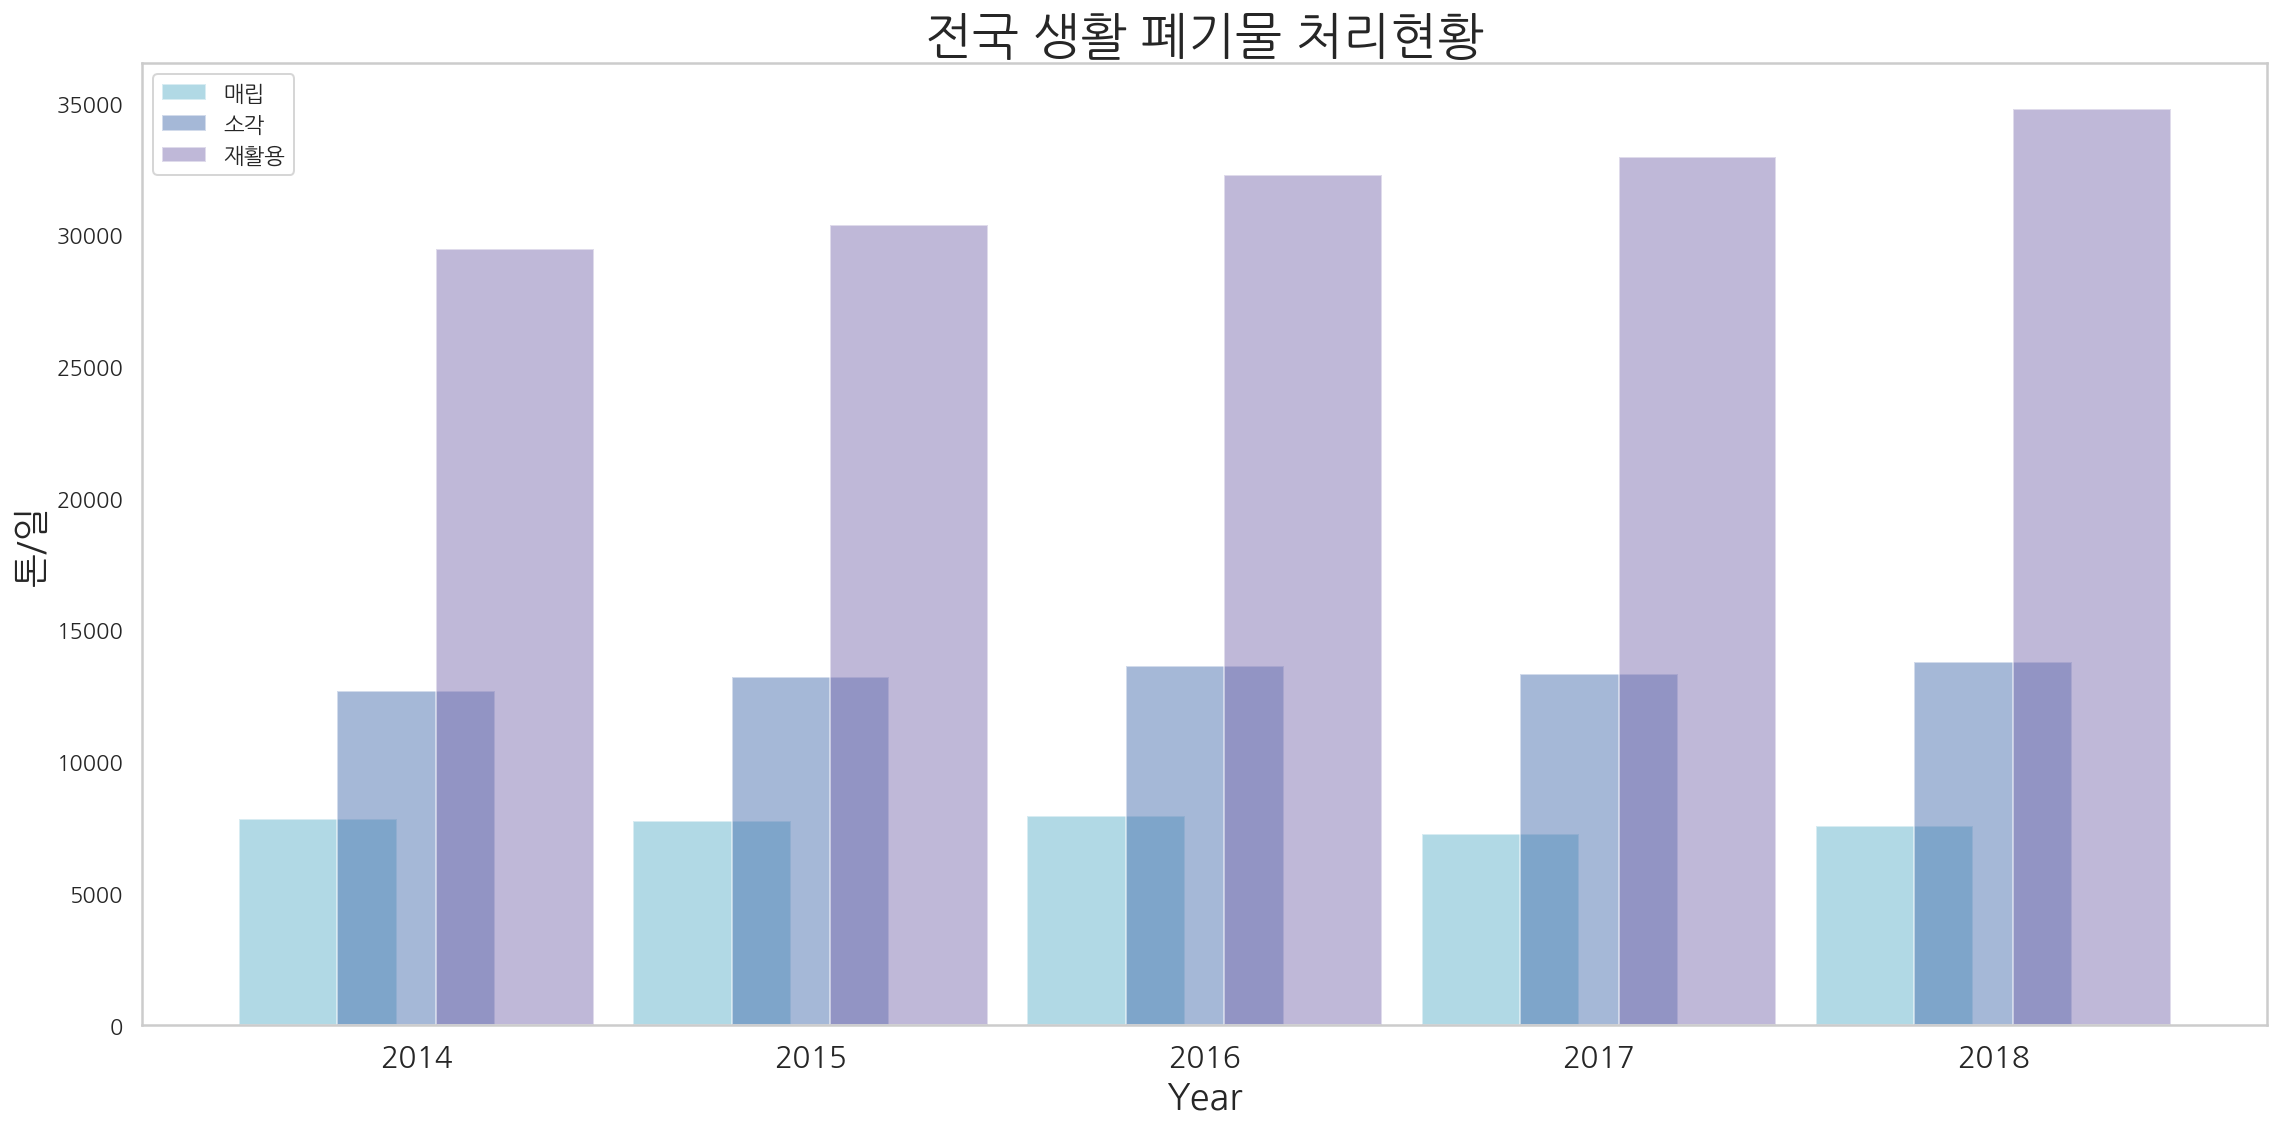

In [59]:
total_disposal.plt_disposal("전국")

### 2) 서울 총 생활 폐기물 처리 현황

In [120]:
seoul_disposal = Waste_disposal("Final_Disposal")

In [121]:
seoul_disposal.disposal_data(1)

,매립,소각,재활용
연도,,,
2014,926.6,2263.3,6423.9
2015,718.9,2218.4,6501.4
2016,766.4,2291.9,6549.7
2017,799.3,2237.8,6180.2
2018,868.5,2167.5,6456.9


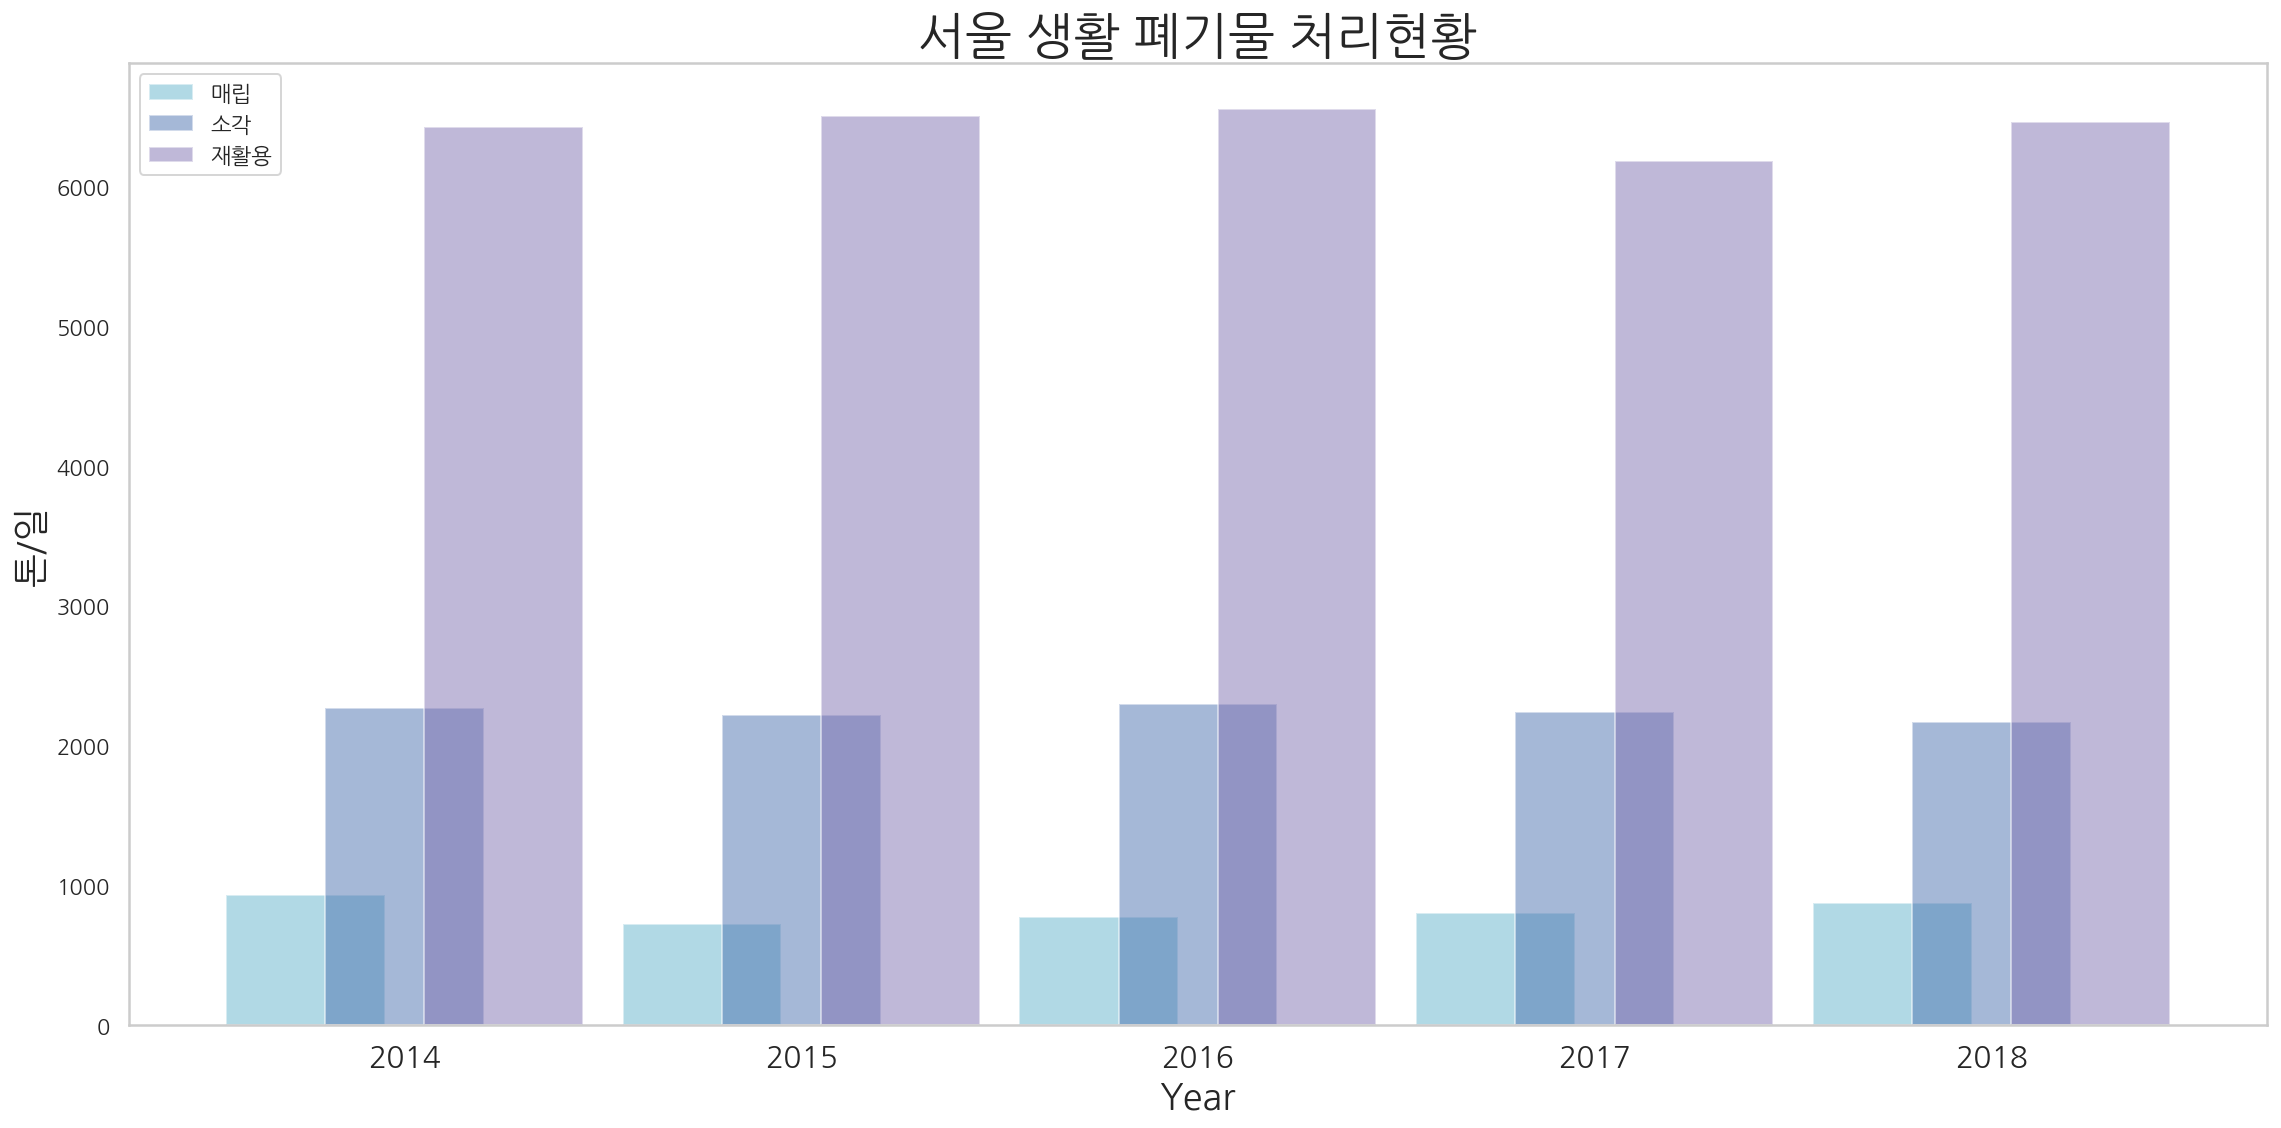

In [126]:
seoul_disposal.plt_disposal("서울")

### 3) 대구 총 생활 폐기물 처리 현황

In [122]:
daegu_disposal = Waste_disposal("Final_Disposal")

In [123]:
daegu_disposal.disposal_data(27)

,매립,소각,재활용
연도,,,
2014,1097.8,357.5,1444.1
2015,1176.0,356.5,1434.0
2016,744.1,315.4,1897.4
2017,428.4,250.0,2217.0
2018,464.8,257.6,2292.4


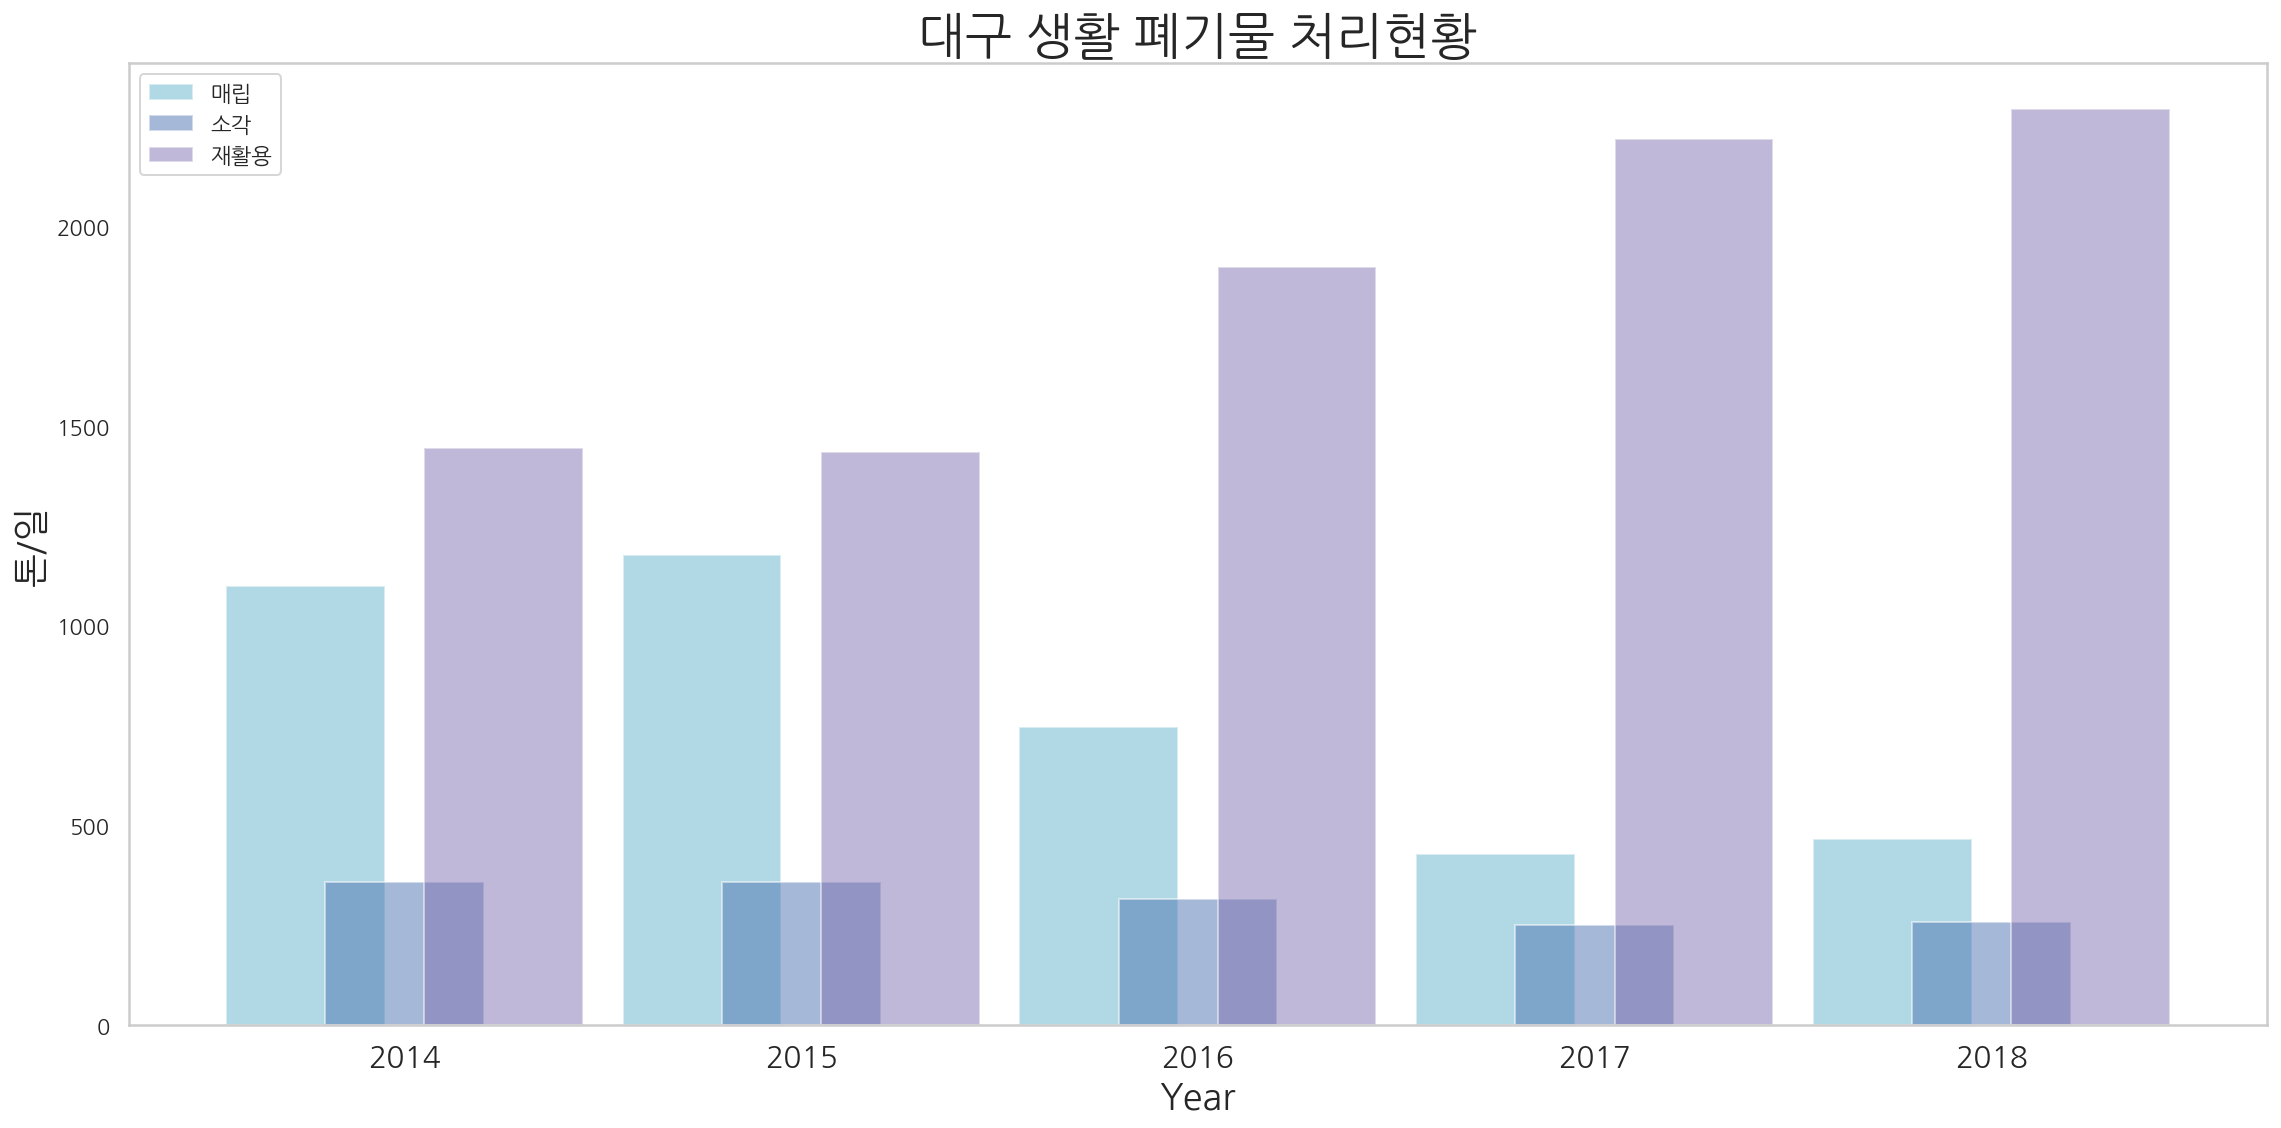

In [127]:
daegu_disposal.plt_disposal("대구")

### 4) 전국 (생활)폐플라스틱 폐기물 총 재활용량, 재할용 비중

In [134]:
total_recycle = Waste_disposal("Final_Disposal")

In [135]:
total_recycle.recycle_percentage(0)

,재활용,재활용 비중(%)
연도,,
2014,29454.2,59.008951
2015,30352.2,59.227503
2016,32252.9,59.980957
2017,32931.4,61.566102
2018,34747.1,62.009194


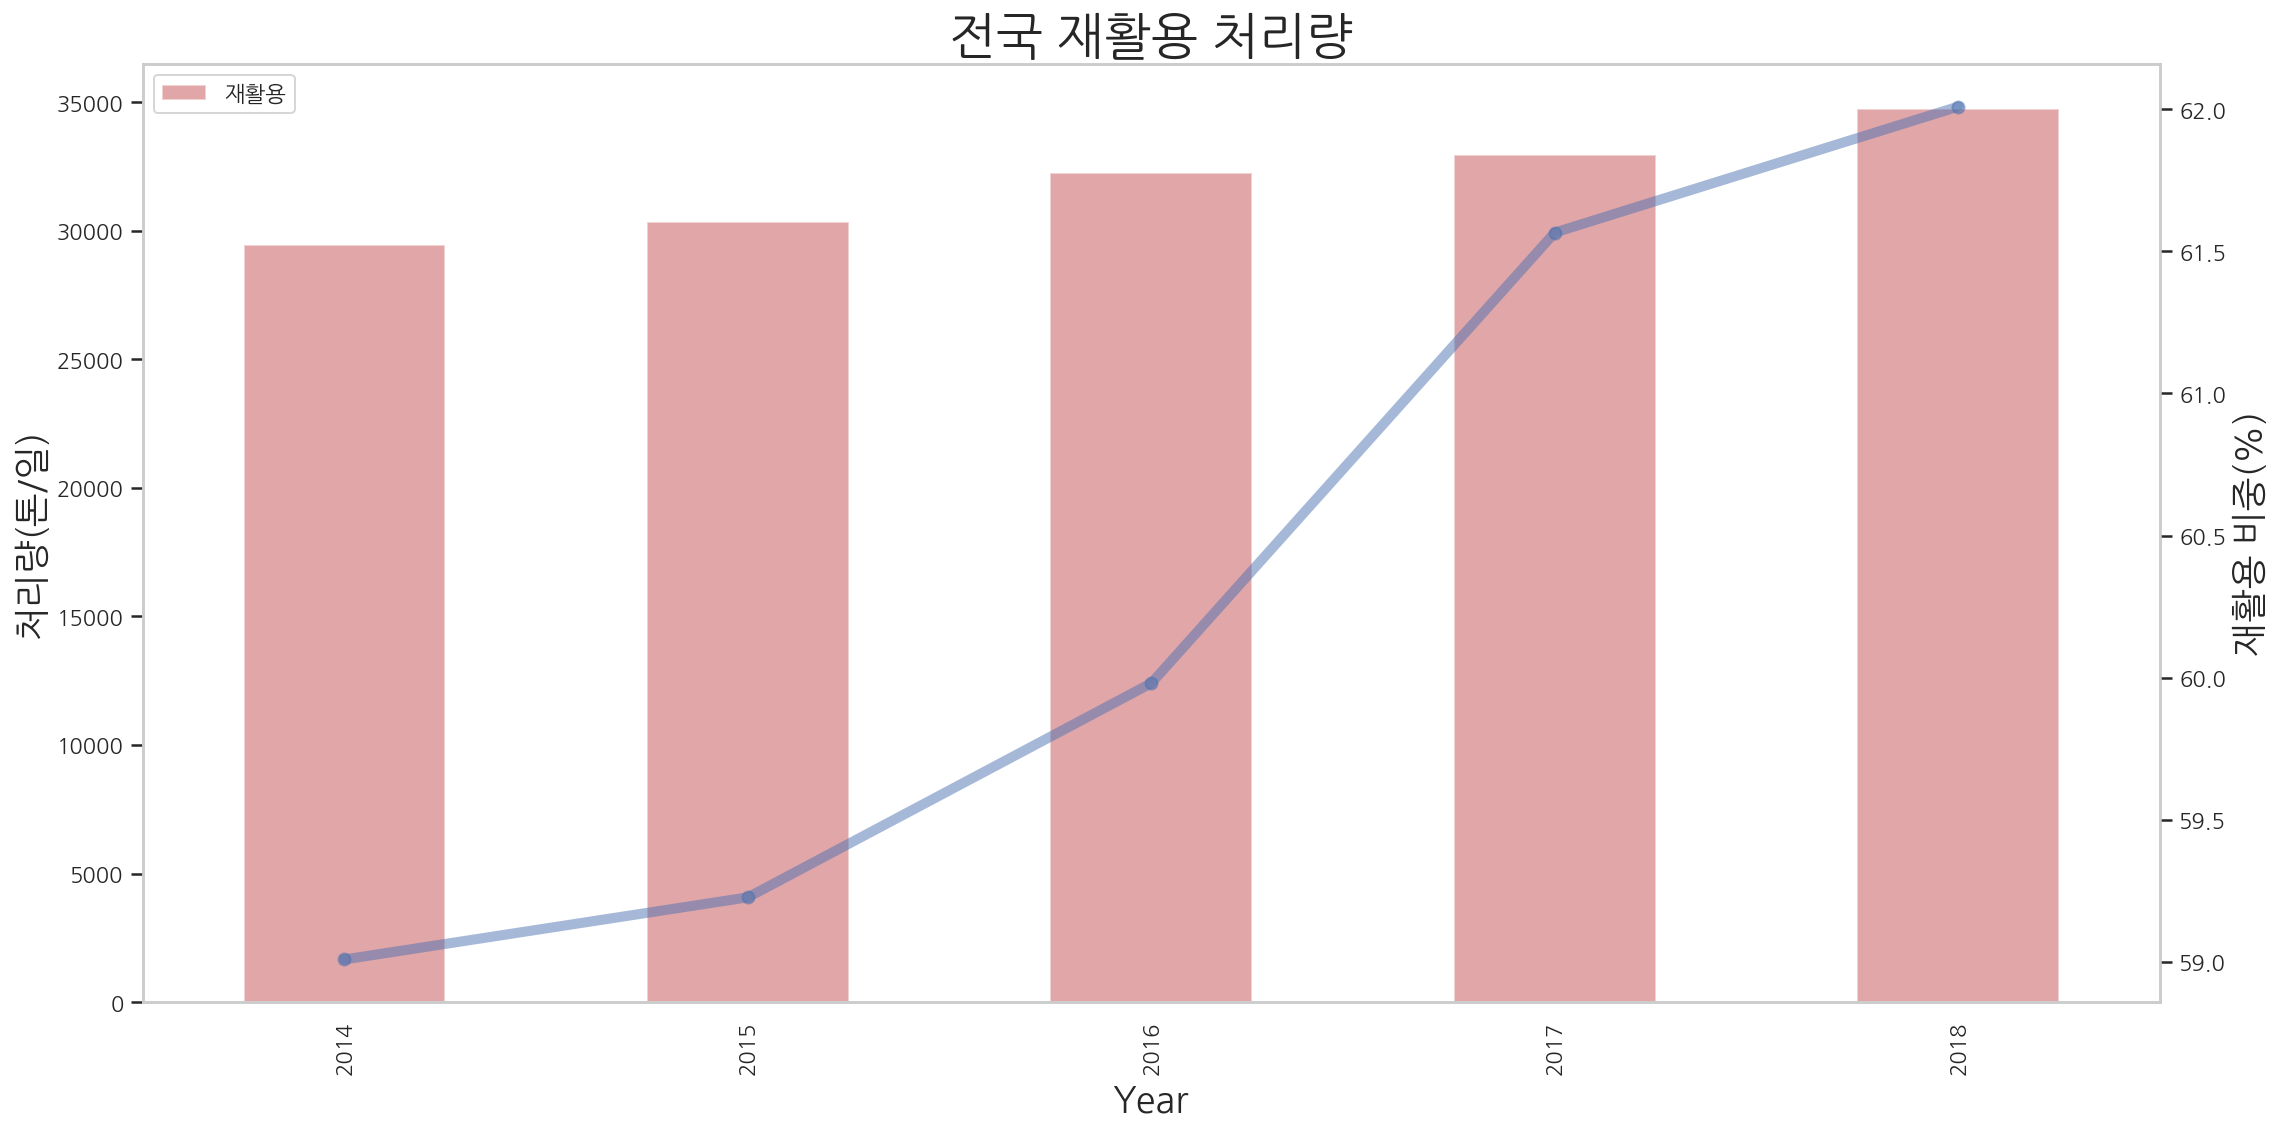

In [136]:
total_recycle.plt_recycle("전국")

### 5) 서울 (생활)폐플라스틱 폐기물 총 재활용량, 재할용 비중

In [137]:
seoul_recycle = Waste_disposal("Final_Disposal")

In [139]:
seoul_recycle.recycle_percentage(1)

,재활용,재활용 비중(%)
연도,,
2014,6423.9,66.819572
2015,6501.4,68.880248
2016,6549.7,68.169234
2017,6180.2,67.050004
2018,6456.9,68.018203


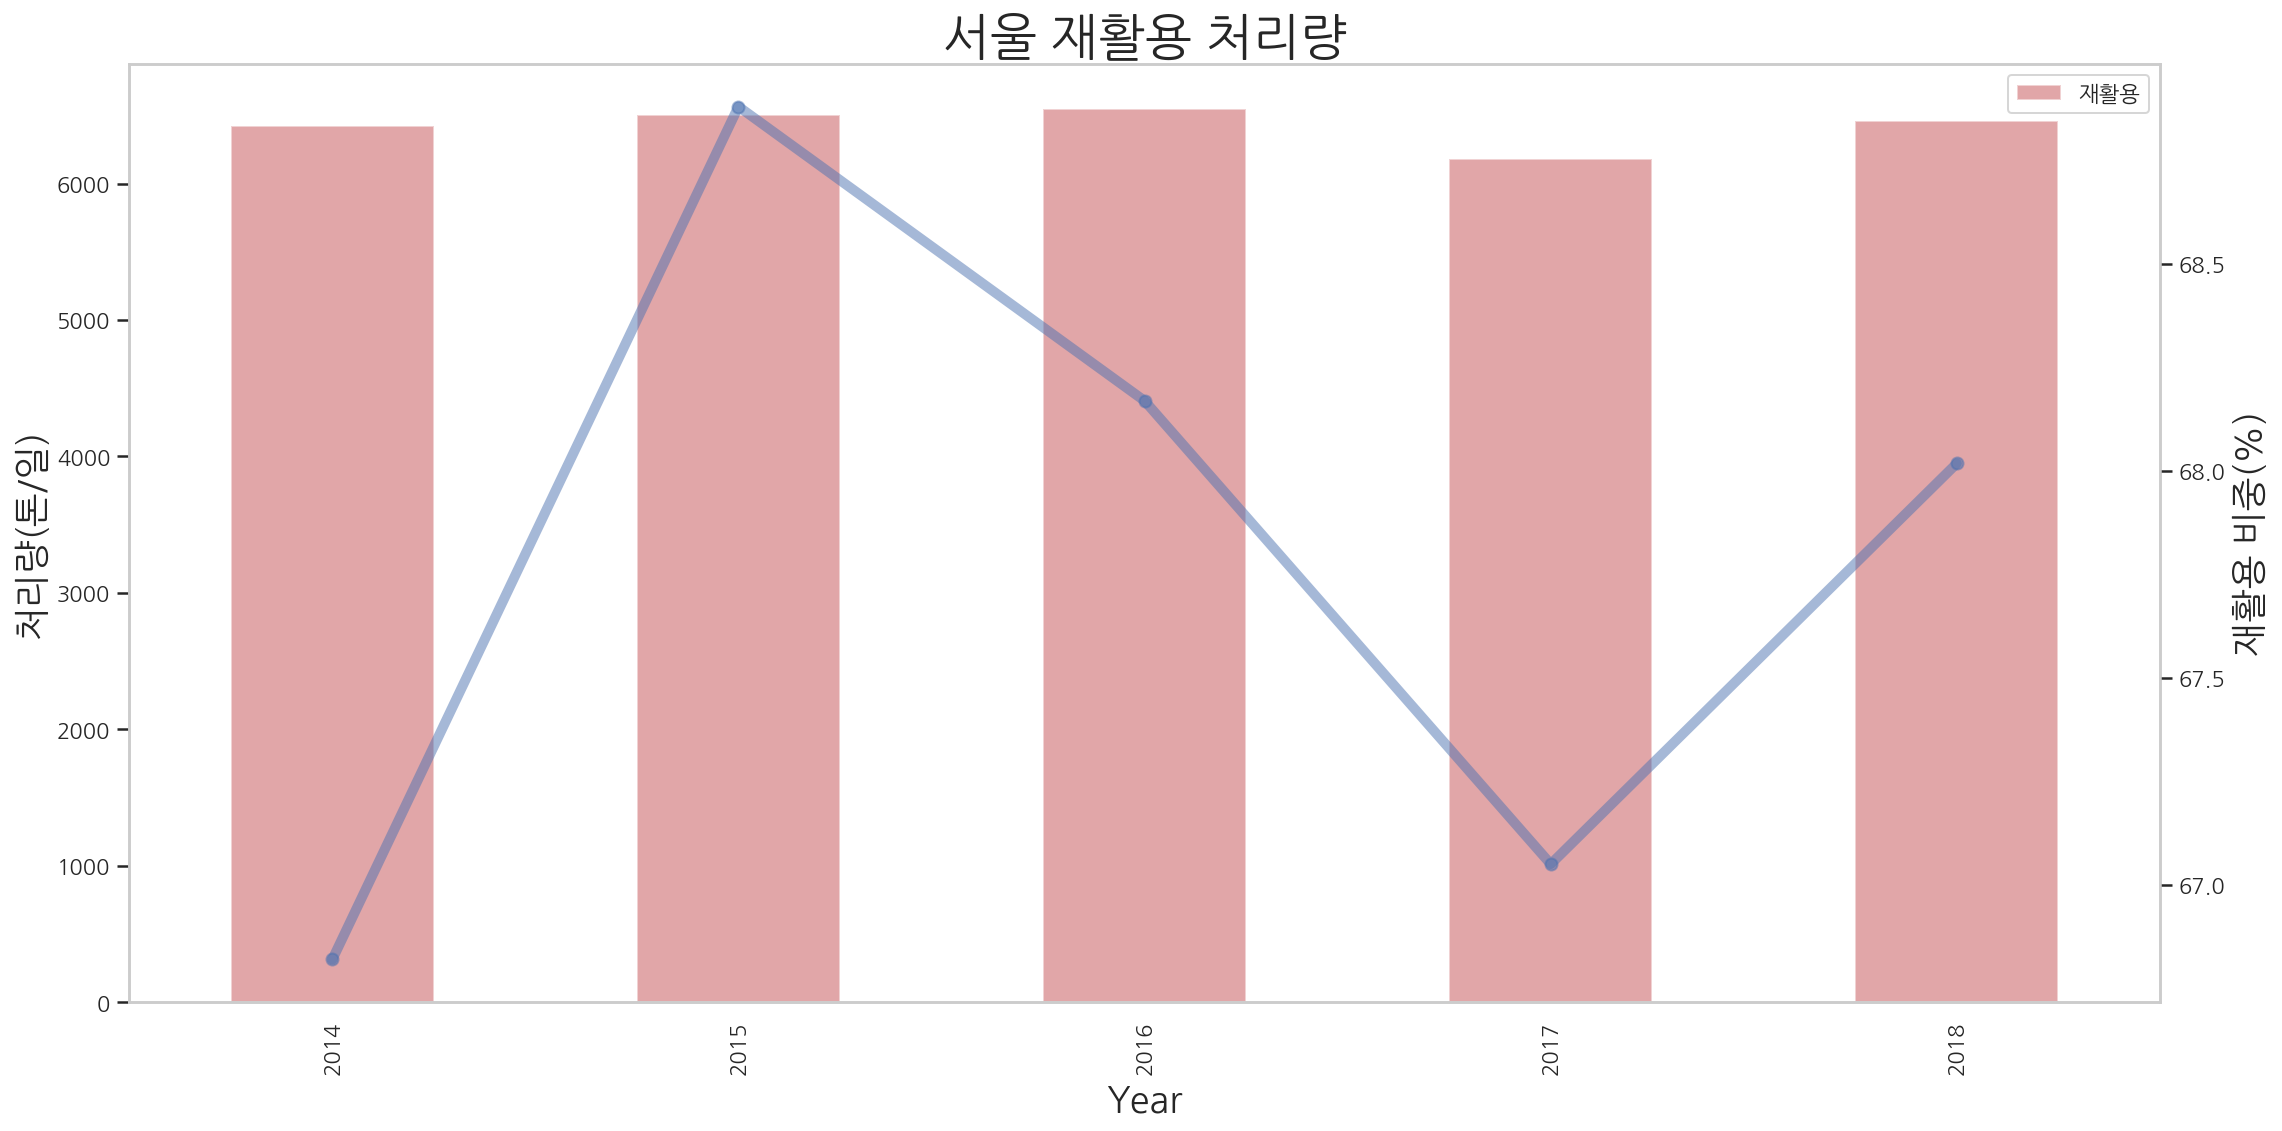

In [140]:
seoul_recycle.plt_recycle("서울")

### 6) 대구 (생활)폐플라스틱 폐기물 총 재활용량, 재할용 비중

In [141]:
daegu_recycle = Waste_disposal("Final_Disposal")

In [142]:
daegu_recycle.recycle_percentage(27)

,재활용,재활용 비중(%)
연도,,
2014,1444.1,49.806857
2015,1434.0,48.339794
2016,1897.4,64.168555
2017,2217.0,76.569731
2018,2292.4,76.038211


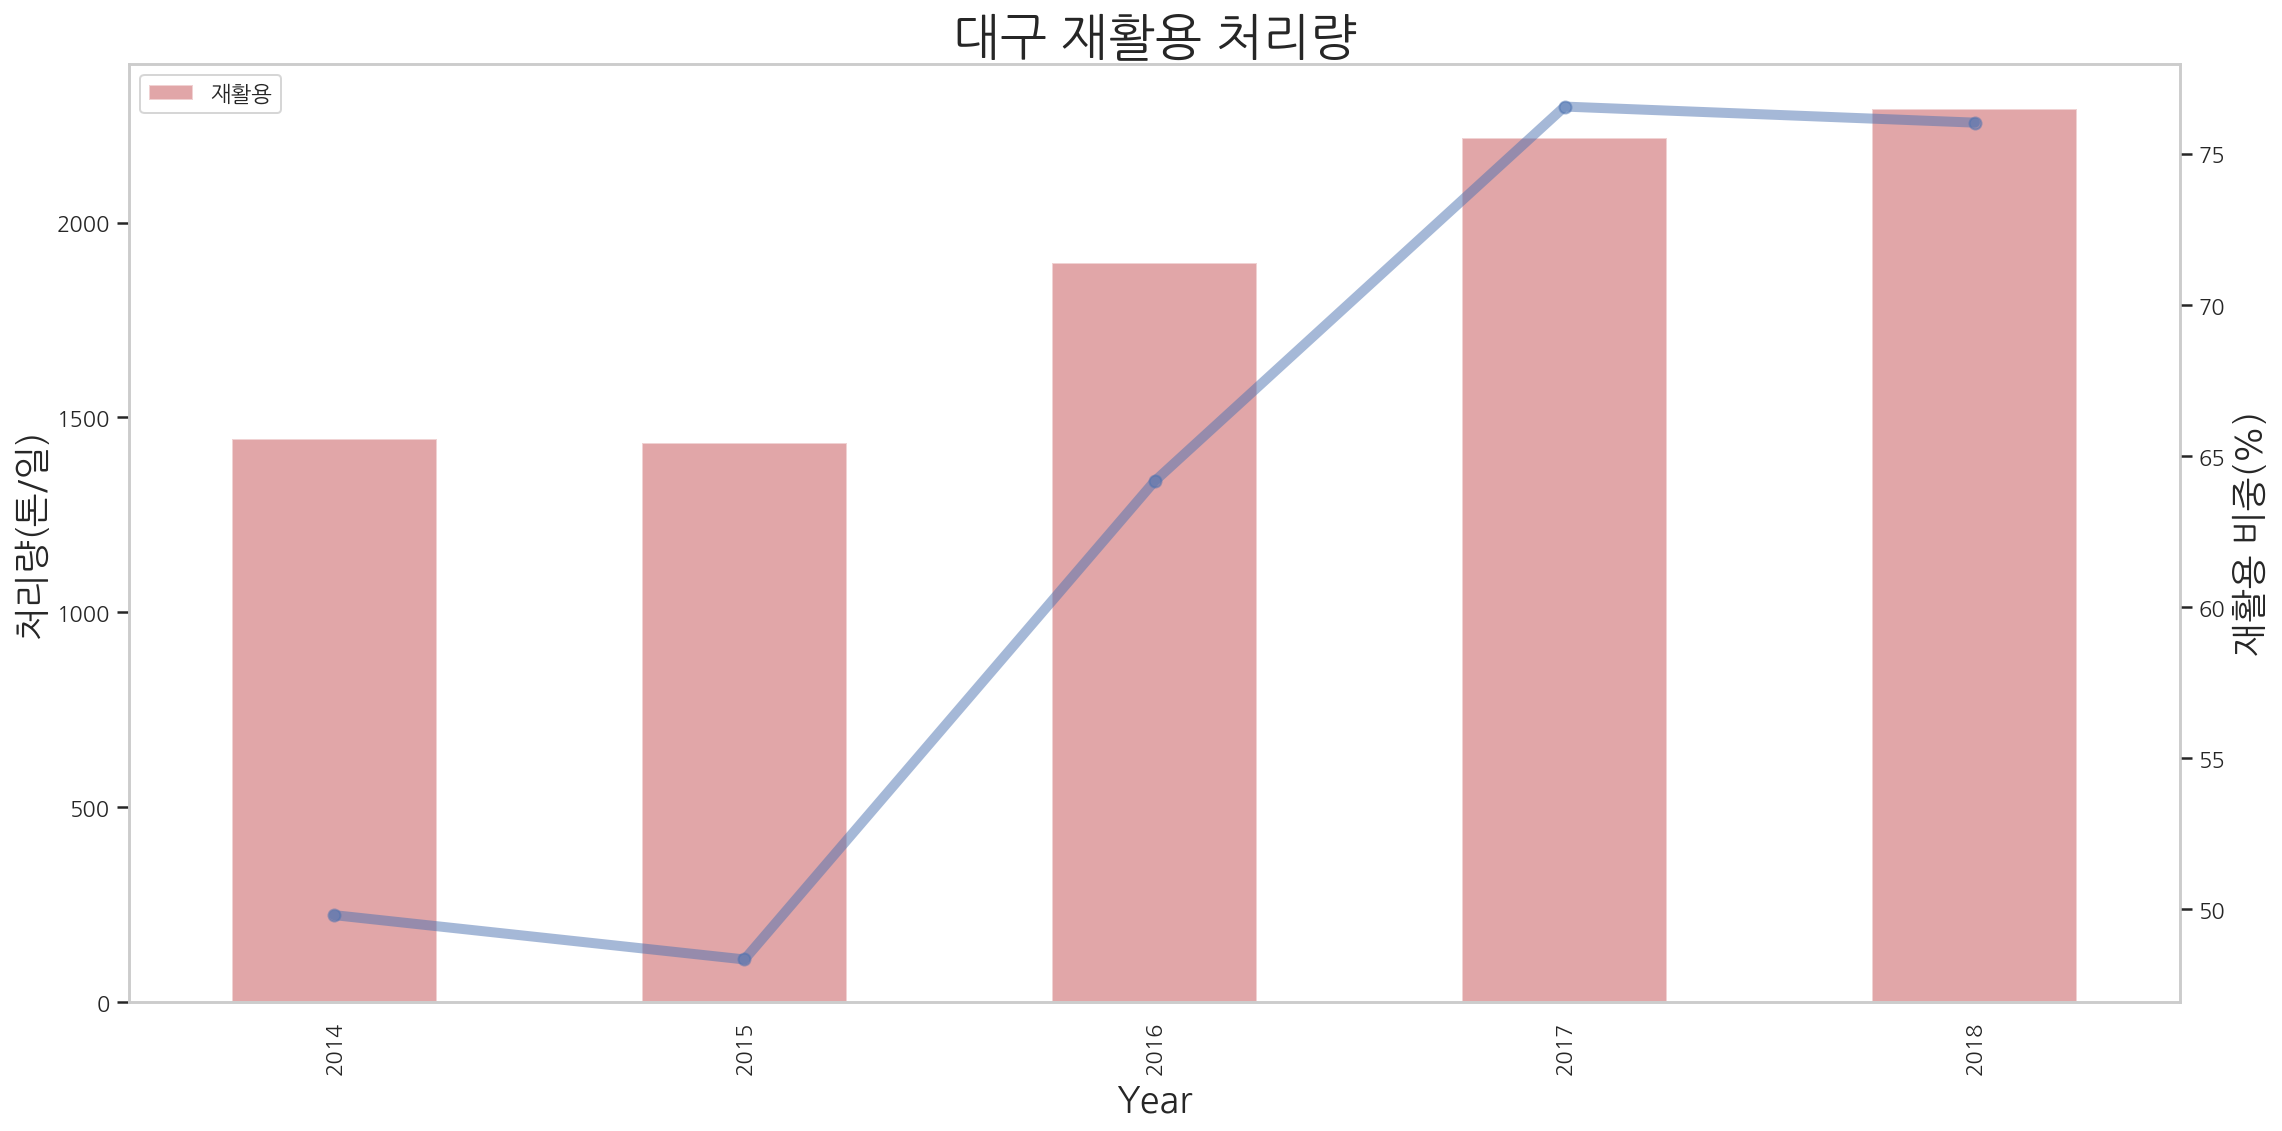

In [143]:
daegu_recycle.plt_recycle("대구")

##### (data3) 폐플라스틱의 실제적 처리 현황 (매립 소각 재활용 비율 => percentage로 비교) 
##### 세개를 동시에 연도별 지역별 시각화_분석 (유럽과 우리나라를 비교->논문, 메거진 참고 요망)
##### => 4. 4-3 시각화에서 [2018년_전국] OR [5년 3개의 비율 평균화_전국] 폐플라스틱 실제적 처리 현황 둥근 피자모양으로 시각화 -> 소각과 재활용의

In [5]:
test = Read_trash_data("Final_Plastic_Disposal")

In [12]:
test.original_trash_2018

,시도,시군구,처리방법,처리량_총계,종량제_가연성_플라스틱류,재활용_플라스틱류,처리현황별_플라스틱_총계,처리현황별_플라스틱 비중(%),플라스틱 재활용 비중(%)
0,전국,합계,처리량,56035.4,4884.4,1490.7,6375.1,11.376915,2.660283
1,전국,합계,매립,7525.4,934.1,0.0,934.1,12.412629,0.000000
2,전국,합계,소각,13762.9,2896.0,0.0,2896.0,21.042077,0.000000
3,전국,합계,재활용,34747.1,1054.3,1490.7,2545.0,7.324352,4.290142
4,서울,소계,처리량,9492.9,464.2,284.2,748.4,7.883787,2.993816
...,...,...,...,...,...,...,...,...,...
139,대구,달서구,재활용,448.2,19.9,14.5,34.4,7.675145,3.235163
140,대구,달성군,처리량,287.7,39.3,13.0,52.3,18.178658,4.518596
141,대구,달성군,매립,39.6,9.3,0.0,9.3,23.484848,0.000000
142,대구,달성군,소각,30.9,7.5,0.0,7.5,24.271845,0.000000


In [7]:
### 플라스틱_처리현황별_플라스틱 비중(%) : 폐플라스틱 처리량 중 플라스틱의 처리현황 비중
a = test.original_trash_2014[["처리현황별_플라스틱_총계"]].loc[0:3]
#b = test.original_trash_2015[["매립", "소각", "재활용"]].loc[0]
#c = test.original_trash_2016[["매립", "소각", "재활용"]].loc[0]
#d = test.original_trash_2017[["매립", "소각", "재활용"]].loc[0]
#e = test.original_trash_2018[["매립", "소각", "재활용"]].loc[0]
a

,처리현황별_플라스틱_총계
0,4606.76
1,826.40
2,2130.40
3,1649.96


In [11]:
a.values[2][0]

2130.4

In [152]:
a.values[1]/a.values[0]*100

array([17.93885507])

In [147]:
a.values[0]

array([826.4])

In [ ]:
f = [a.values[0], b.values[0], c.values[0], d.values[0], e.values[0]]
g = [a.values[1], b.values[1], c.values[1], d.values[1], e.values[1]]
h = [a.values[2], b.values[2], c.values[2], d.values[2], e.values[2]]

In [ ]:
dt = {"매립":f, "소각":g, "재활용":h}
df = pd.DataFrame(dt)
df

In [4]:
class Plastic_disposal(Read_trash_data):
    
    ## 생활폐기물 data 생성 class 상속
    def __init__(self, data):
        super().__init__(data)
        
        
    ## 연도별 / 전국(num=0), 서울(num=1), 대구(num=27) 별로 폐플라스틱 처리 방법(매립, 소각, 재활용) data 만 뽑아내기
    def plastic_disposal_data(self, num1, num2):                
        ### 폐기물 처리방법은 매립, 소각, 재활용 으로 3가지이다. 
        self.trash_2014 = self.original_trash_2014[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2015 = self.original_trash_2015[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2016 = self.original_trash_2016[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2017 = self.original_trash_2017[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2018 = self.original_trash_2018[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        
        plastic_landfill = [self.trash_2014.values[0][0], self.trash_2015.values[0][0], 
                           self.trash_2016.values[0][0], self.trash_2017.values[0][0], self.trash_2018.values[0][0]]
        plastic_incineration = [self.trash_2014.values[1][0], self.trash_2015.values[1][0], 
                           self.trash_2016.values[1][0], self.trash_2017.values[1][0], self.trash_2018.values[1][0]]
        plastic_recyclable_waste = [self.trash_2014.values[2][0], self.trash_2015.values[2][0], 
                           self.trash_2016.values[2][0], self.trash_2017.values[2][0], self.trash_2018.values[2][0]]
        
        data = {"플라스틱_매립":plastic_landfill, "플라스틱_소각":plastic_incineration, "플라스틱_재활용":plastic_recyclable_waste,
                "연도":[2014, 2015, 2016, 2017, 2018]}
        self.plastic_disposal_df = pd.DataFrame(data)
        self.plastic_disposal_df.set_index("연도", inplace=True)
        
        return self.plastic_disposal_df
    
    
    ## 연도별 / 전국, 서울, 대구 별로 총 폐플라스틱 처리량에서 재활용, 소각의 비중 data 만 뽑아내기
    def incineration_recycle_percentage(self, num1, num2):                
        self.trash_2014 = self.original_trash_2014[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2015 = self.original_trash_2015[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2016 = self.original_trash_2016[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2017 = self.original_trash_2017[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        self.trash_2018 = self.original_trash_2018[["처리현황별_플라스틱_총계"]].loc[num1:num2]
        
        
        # self.trash_2014.values[2][0] => list로 나온 value 값을 [0]째를 뽑는다 해서 실제 value값을 뽑을 수 있다.
        # 플라스틱 처리방법 별에서 플라스틱 총 계를 나눈다.
        plastic_incineration_percentage = [self.trash_2014.values[2][0]/self.trash_2014.values[0][0]*100,
                                           self.trash_2015.values[2][0]/self.trash_2015.values[0][0]*100,
                                           self.trash_2016.values[2][0]/self.trash_2016.values[0][0]*100,
                                           self.trash_2017.values[2][0]/self.trash_2017.values[0][0]*100,
                                           self.trash_2018.values[2][0]/self.trash_2018.values[0][0]*100]
        plastic_recyclable_waste_percentage = [self.trash_2014.values[3][0]/self.trash_2014.values[0][0]*100,
                                               self.trash_2015.values[3][0]/self.trash_2015.values[0][0]*100,
                                               self.trash_2016.values[3][0]/self.trash_2016.values[0][0]*100,
                                               self.trash_2017.values[3][0]/self.trash_2017.values[0][0]*100,
                                               self.trash_2018.values[3][0]/self.trash_2018.values[0][0]*100]
        
        self.plastic_incineration_recycle_per = [x + y for x, y in zip(plastic_incineration_percentage, plastic_recyclable_waste_percentage)]
                         
        data = {"플라스틱_소각_비중":plastic_incineration_percentage, "플라스틱_재활용_비중":plastic_recyclable_waste_percentage,
                "연도":[2014, 2015, 2016, 2017, 2018]}
        self.plastic_disposal_percentage_df = pd.DataFrame(data)
        self.plastic_disposal_percentage_df.set_index("연도", inplace=True)
        
        return self.plastic_disposal_percentage_df
    
    
    ## 연도별 폐플라스틱 처리방법을 비교 시각화
    def plt_plastic_disposal(self, name):
        index = self.plastic_disposal_df.index
        alpha = 0.5
        plt.figure(figsize=(16, 8))

        plt.bar([x*2 for x in range(len(index))], self.plastic_disposal_df.iloc[:,0], align ="center", color ='c', alpha=alpha)
        plt.bar([x*2+0.5 for x in range(len(index))], self.plastic_disposal_df.iloc[:,1], align ="center", color = 'b', alpha=alpha)
        plt.bar([x*2+1 for x in range(len(index))], self.plastic_disposal_df.iloc[:,2], align ="center", color = 'm', alpha=alpha)

        plt.title("{} 폐플라스틱 처리현황".format(name), fontsize=25)
        plt.ylabel("톤/일", fontsize=18)
        plt.xlabel("Year", fontsize=18)
        plt.xticks([x*2+0.5 for x in range(len(index))],index, fontsize=15)
        plt.grid(False)
        plt.legend(self.plastic_disposal_df.columns, loc="upper left")
        #plt.savefig("{} 생활 폐기물 배출 총량 연도별 비교.jpg".format(name), bbox_inches='tight')
        plt.tight_layout()
        plt.show()
        
        
    ## 연도별 폐플라스틱의 소각, 재활용 비중 비교 시각화
    def plt_plastic_percentage(self, name):
        fig = plt.figure(figsize=(16, 8))
        ax = fig.add_subplot(111)
        
        index = self.plastic_disposal_percentage_df.index
        alpha = 0.5
    

        rect1 = plt.barh(index, self.plastic_disposal_percentage_df.iloc[:,0], align ="center", color ='c', alpha=alpha)
        rect2 = plt.barh(index, self.plastic_disposal_percentage_df.iloc[:,1], left=self.plastic_disposal_percentage_df.iloc[:,0], 
                         align ="center", color = 'b', alpha=alpha)
        
        plt.title("{} 폐플라스틱 소각_재활용 비중".format(name), fontsize=25)
        plt.xlabel("%(percentage)", fontsize=18)
        plt.ylabel("Year", fontsize=18)
        plt.yticks(index, fontsize=15)
        plt.grid()
        plt.legend(self.plastic_disposal_percentage_df.columns, loc="lower right")
        
        #for i, x in enumerate(rect1):
         #   ax.text(0.99*x.get_width(), x.get_y() + x.get_height()/2.0, str(self.plastic_incineration_recycle_per[i])+'%', 
          #           ha = "right", va="center", fontsize=0, color='r')
        #plt.savefig("{} 생활 폐기물 배출 총량 연도별 비교.jpg".format(name), bbox_inches='tight')
        plt.tight_layout()
        plt.show()
        
        return self.plastic_incineration_recycle_per[0]
#    height=0.5
 #   for i, rect in enumerate(rects):
  #  ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(fluctuations[i]) + '%', ha='right', va='center')
  

    plt.show()

### 1) 전국 폐플라스틱 처리현황

In [191]:
total_plastic_disposal = Plastic_disposal("Final_Plastic_Disposal")

In [192]:
total_plastic_disposal.plastic_disposal_data(1,3)

,플라스틱_매립,플라스틱_소각,플라스틱_재활용
연도,,,
2014,826.4,2130.4,1649.96
2015,891.2,2318.8,1728.60
2016,901.6,2473.8,2070.20
2017,898.6,2571.4,2382.30
2018,934.1,2896.0,2545.00


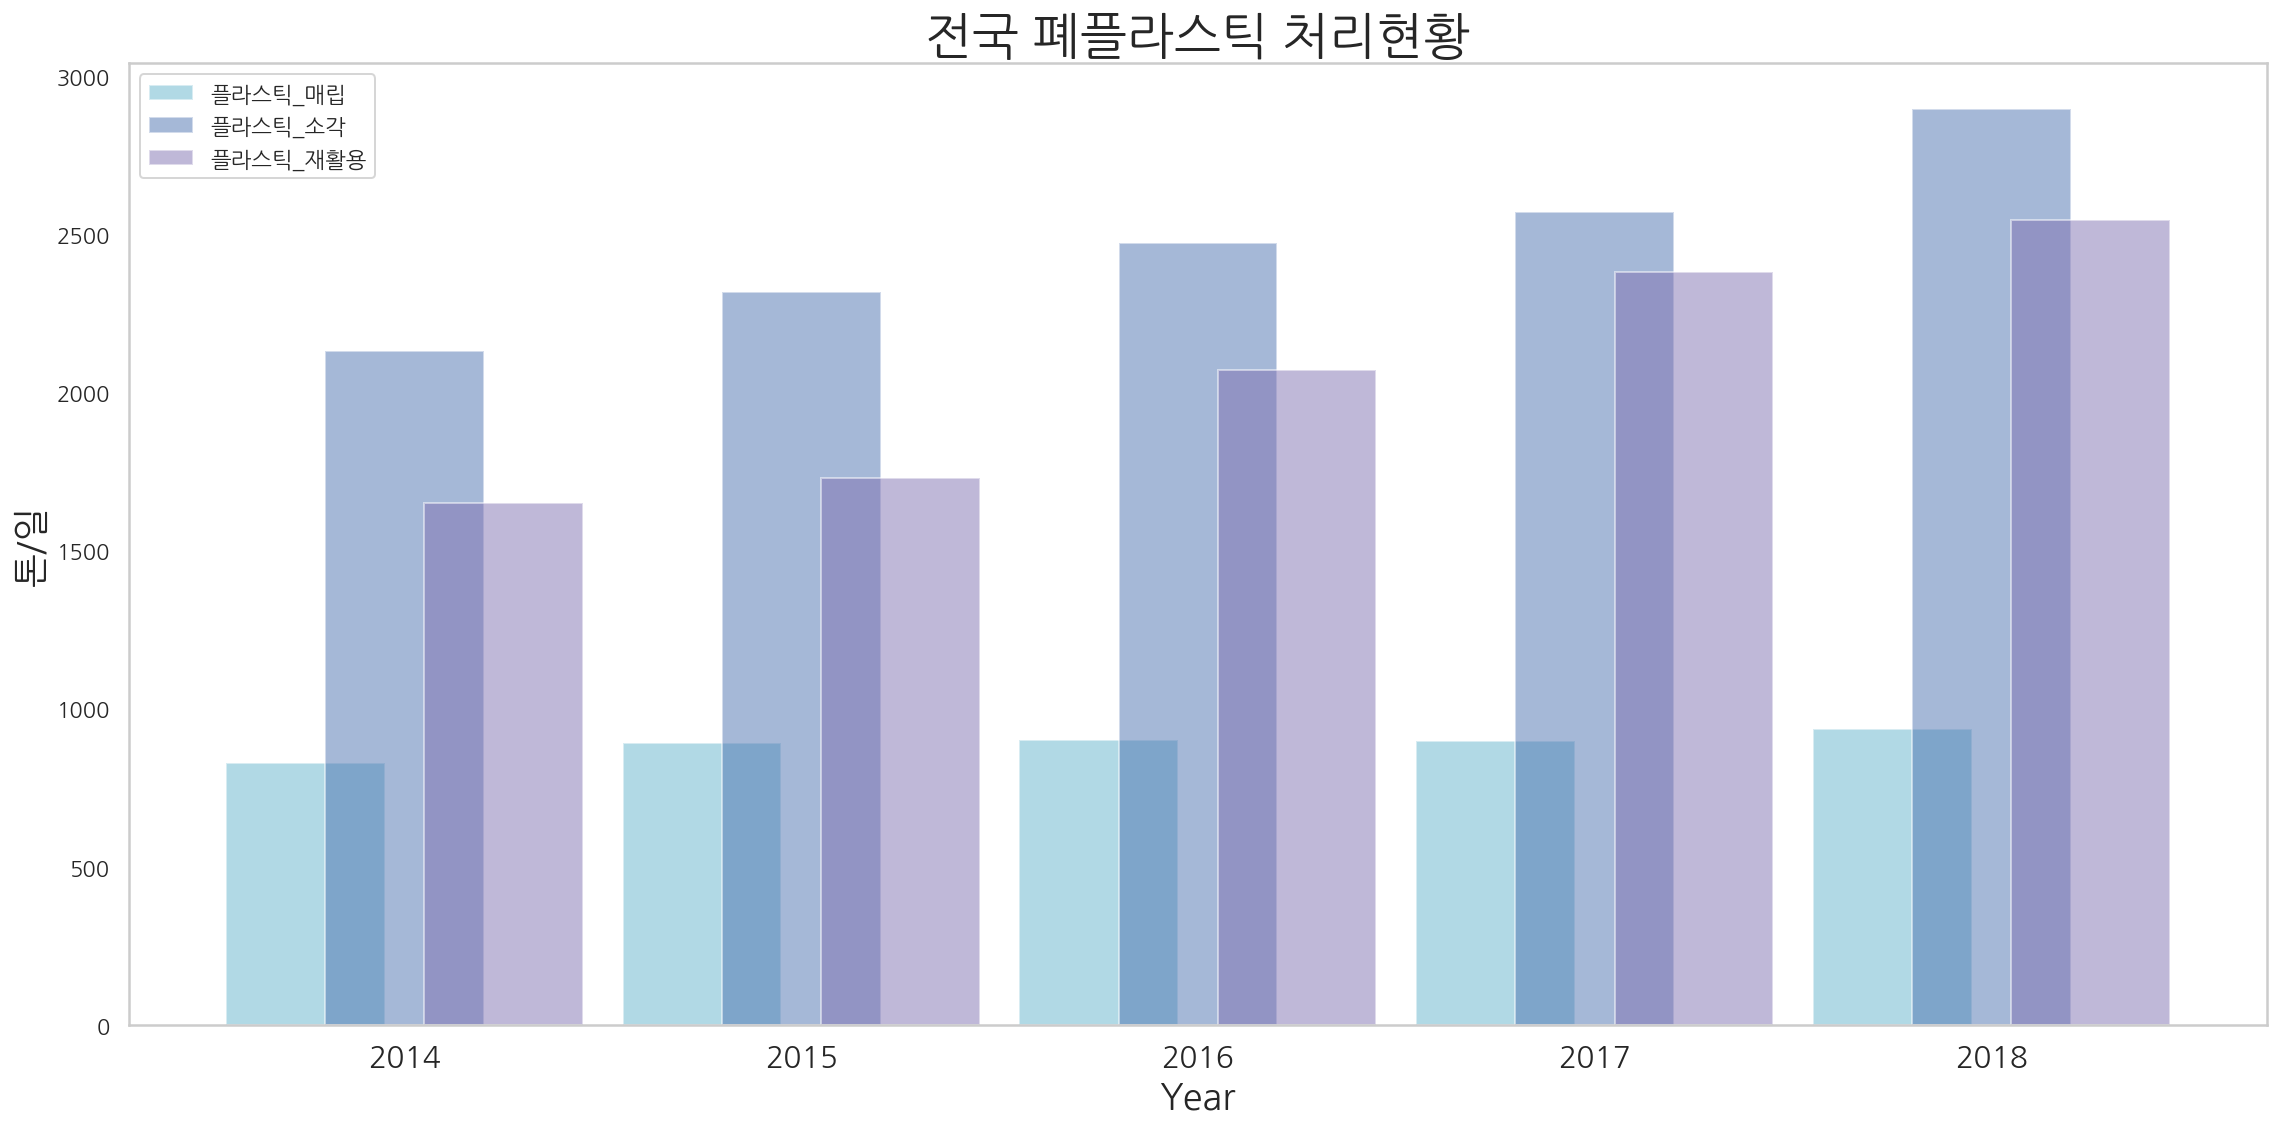

In [193]:
total_plastic_disposal.plt_plastic_disposal("전국")

### 2) 서울 폐플라스틱 처리현황

In [245]:
seoul_plastic_disposal = Plastic_disposal("Final_Plastic_Disposal")

In [246]:
seoul_plastic_disposal.plastic_disposal_data(5,7)

,플라스틱_매립,플라스틱_소각,플라스틱_재활용
연도,,,
2014,58.7,220.4,302.7
2015,76.3,250.5,289.5
2016,84.8,265.9,308.1
2017,98.3,379.4,366.2
2018,122.2,341.7,284.5


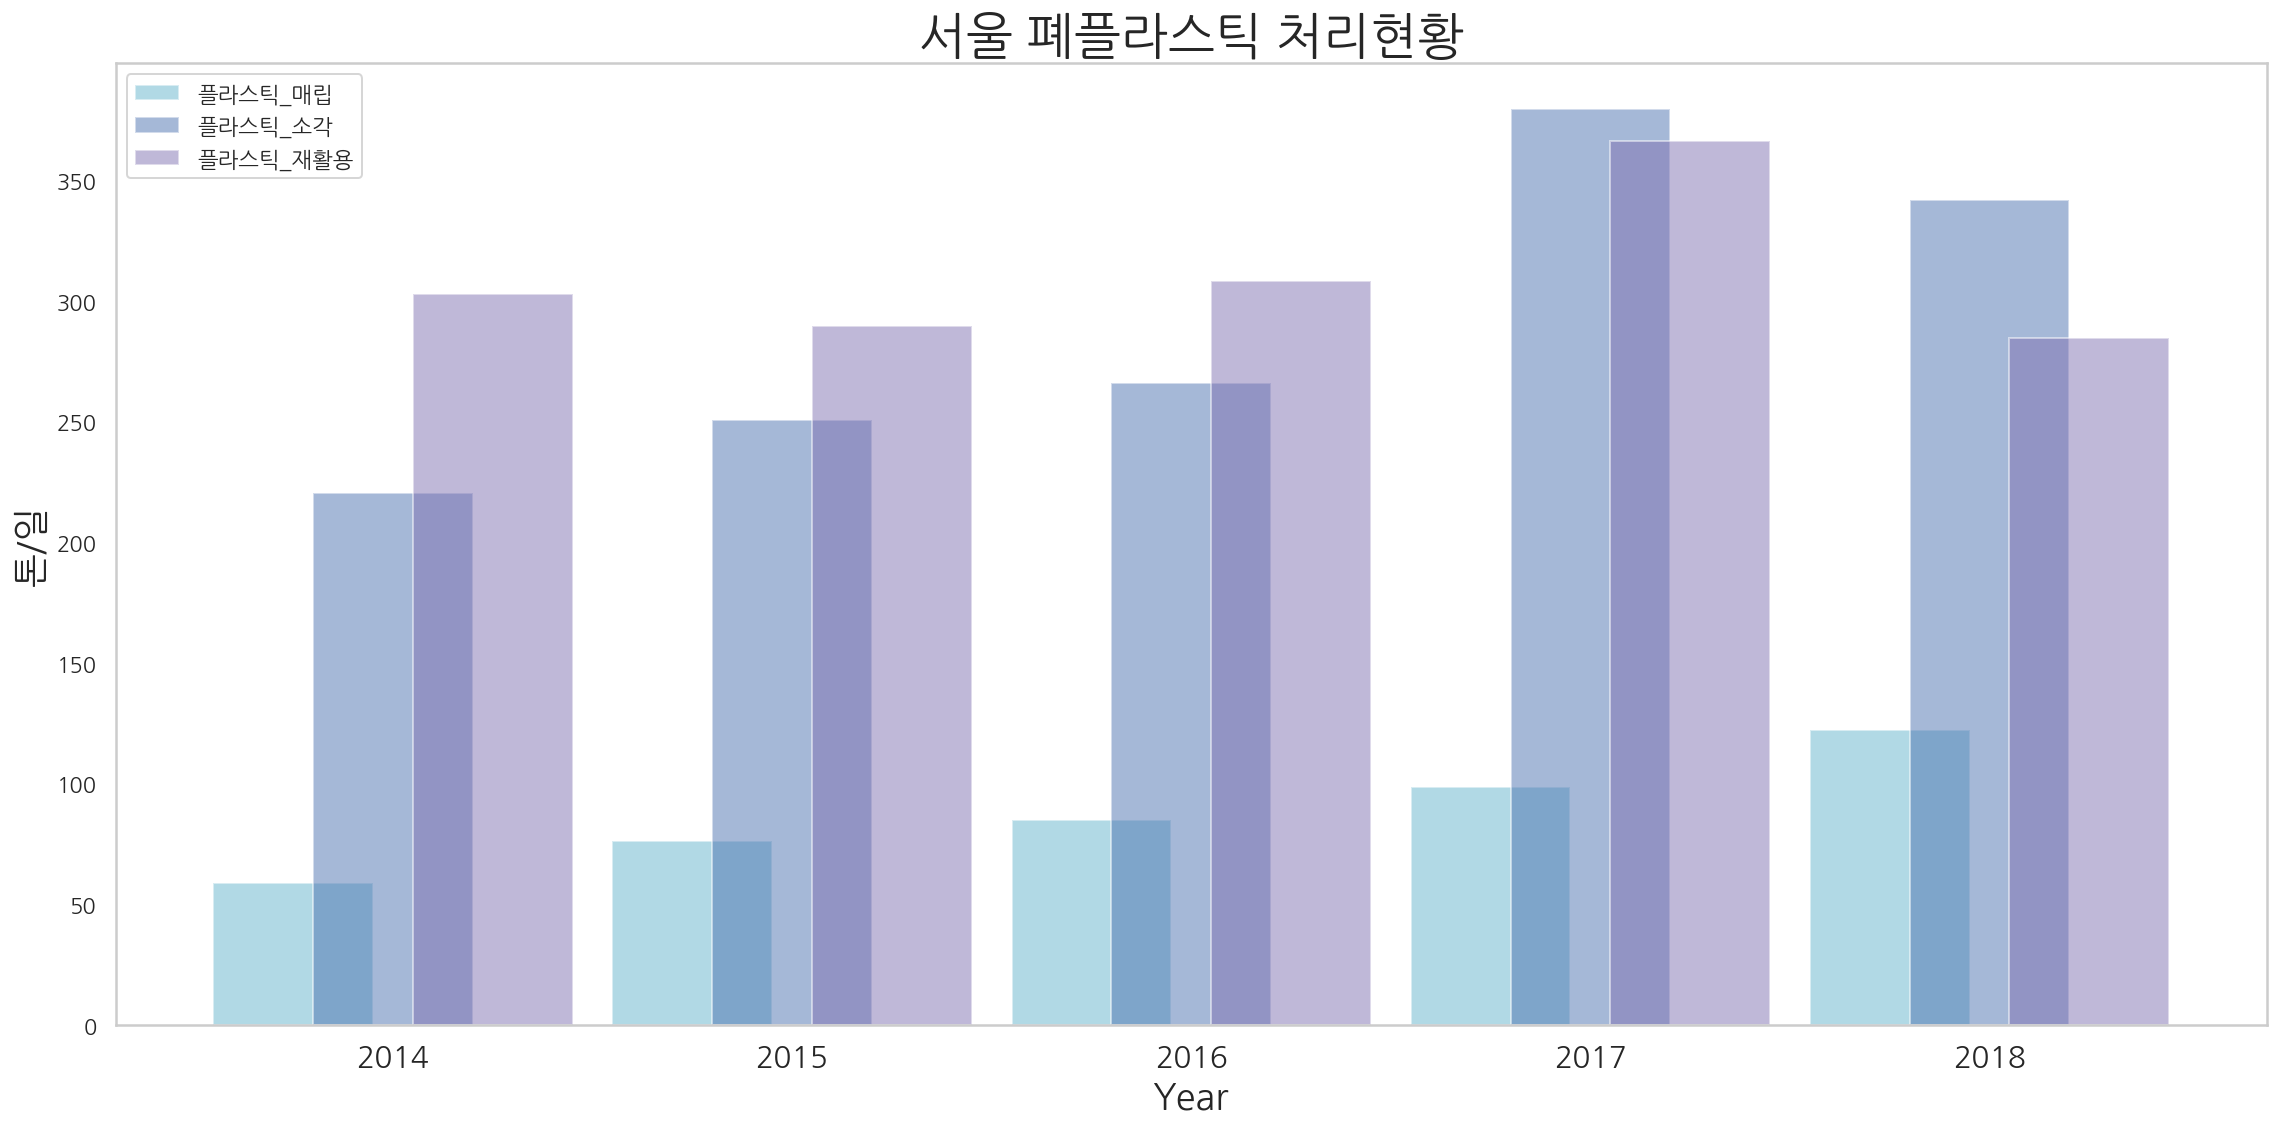

In [247]:
seoul_plastic_disposal.plt_plastic_disposal("서울")

### 3) 대구 폐플라스틱 처리현황

In [251]:
daegu_plastic_disposal = Plastic_disposal("Final_Plastic_Disposal")

In [265]:
daegu_plastic_disposal.plastic_disposal_data(109,111)

,플라스틱_매립,플라스틱_소각,플라스틱_재활용
연도,,,
2014,172.6,59.0,87.96
2015,210.1,72.4,89.10
2016,133.4,61.3,219.30
2017,69.7,50.1,278.80
2018,78.2,49.5,265.40


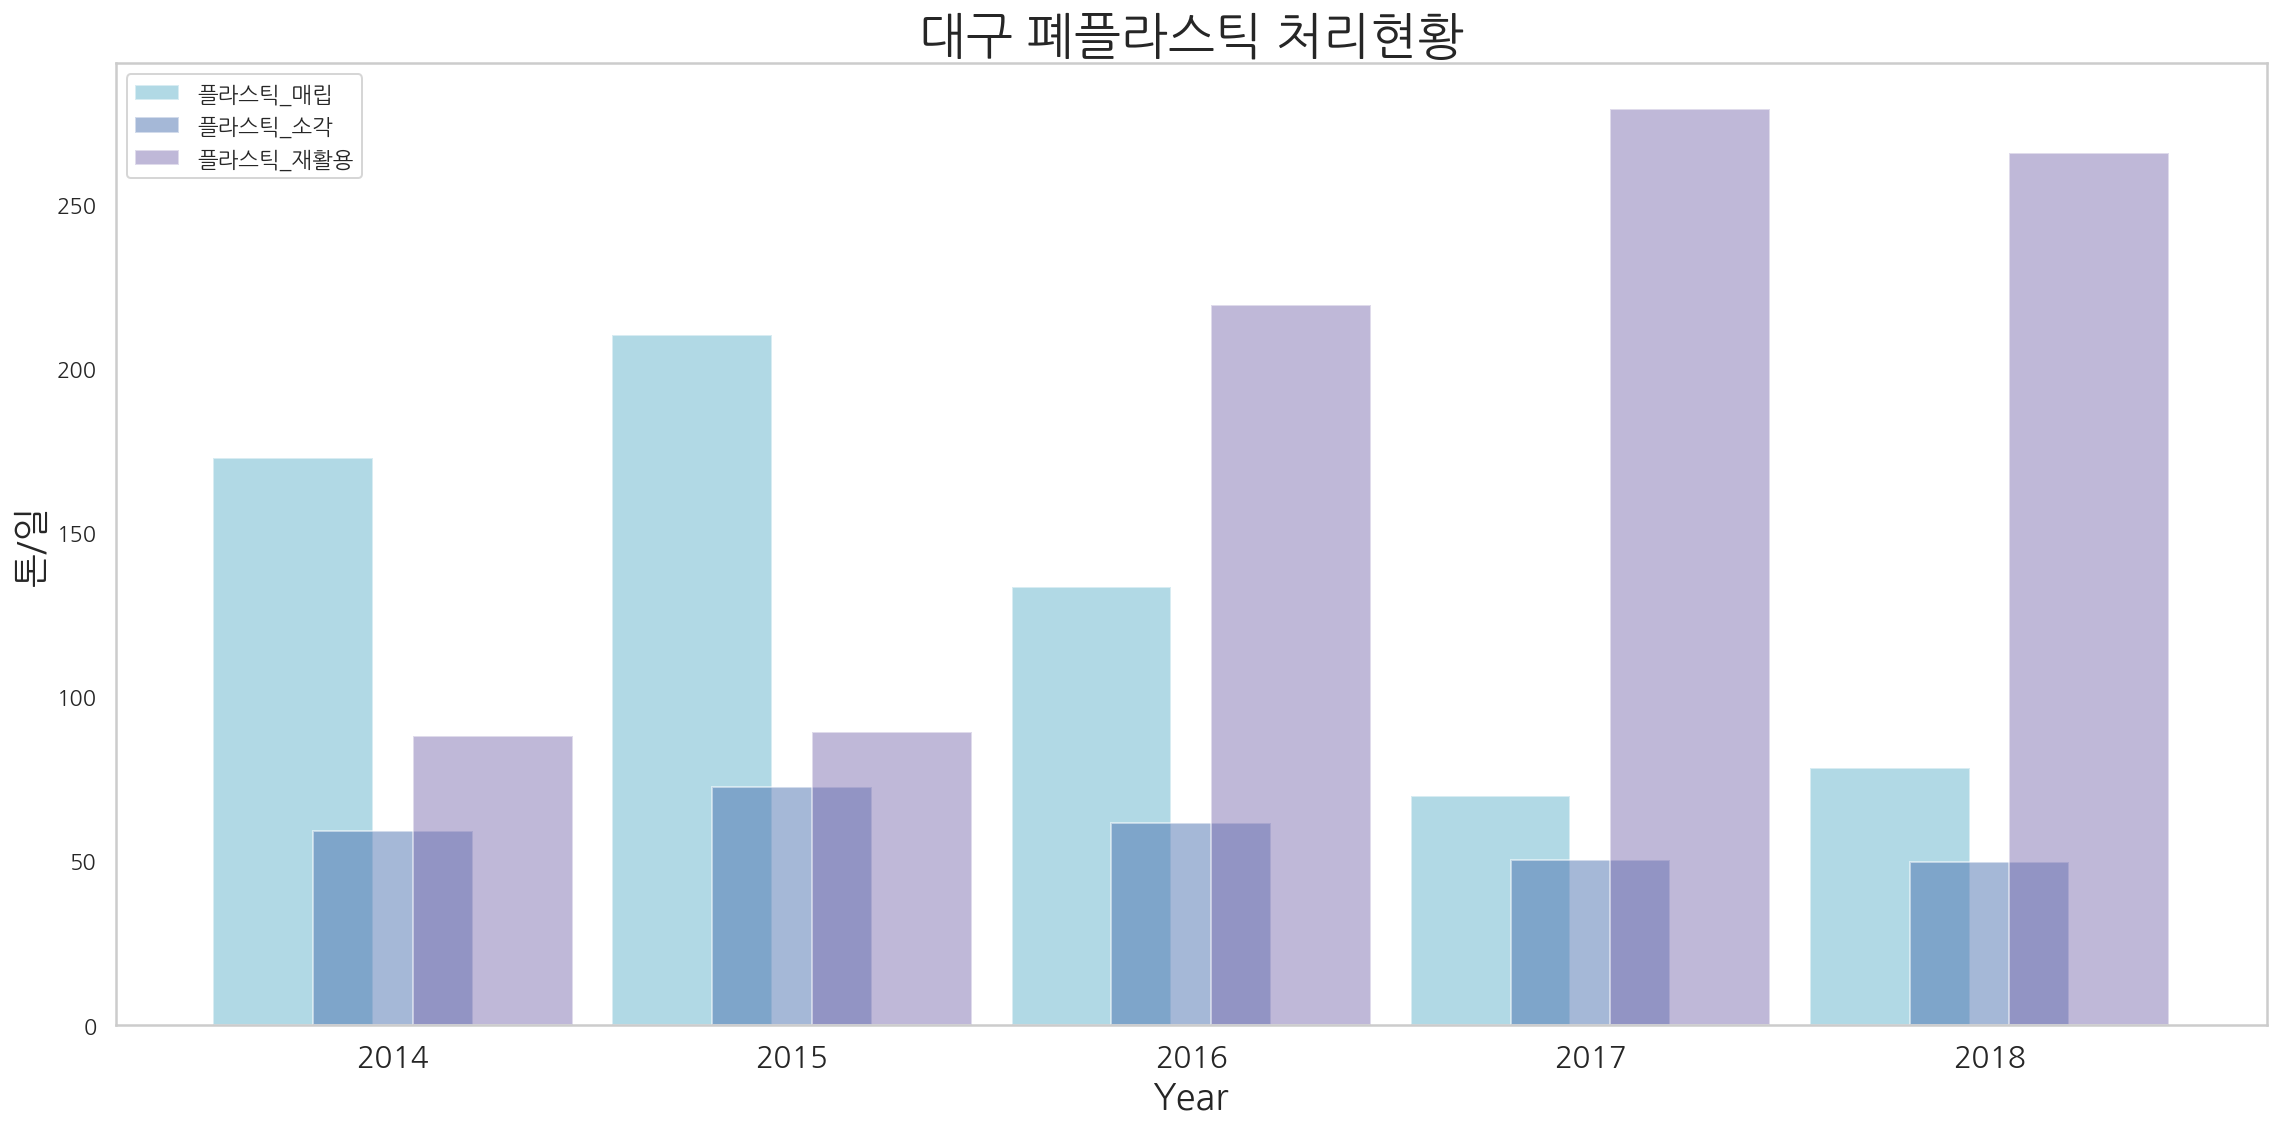

In [266]:
daegu_plastic_disposal.plt_plastic_disposal("대구")

### 4) 전국 폐플라스틱 소각, 재활용 비중

In [272]:
total_plastic_disposal_percentage = Plastic_disposal("Final_Plastic_Disposal")

In [273]:
total_plastic_disposal_percentage.incineration_recycle_percentage(0,3)

,플라스틱_소각_비중,플라스틱_재활용_비중
연도,,
2014,46.245083,35.816062
2015,46.952578,35.001822
2016,45.427501,38.016013
2017,43.938281,40.707072
2018,45.426738,39.920942


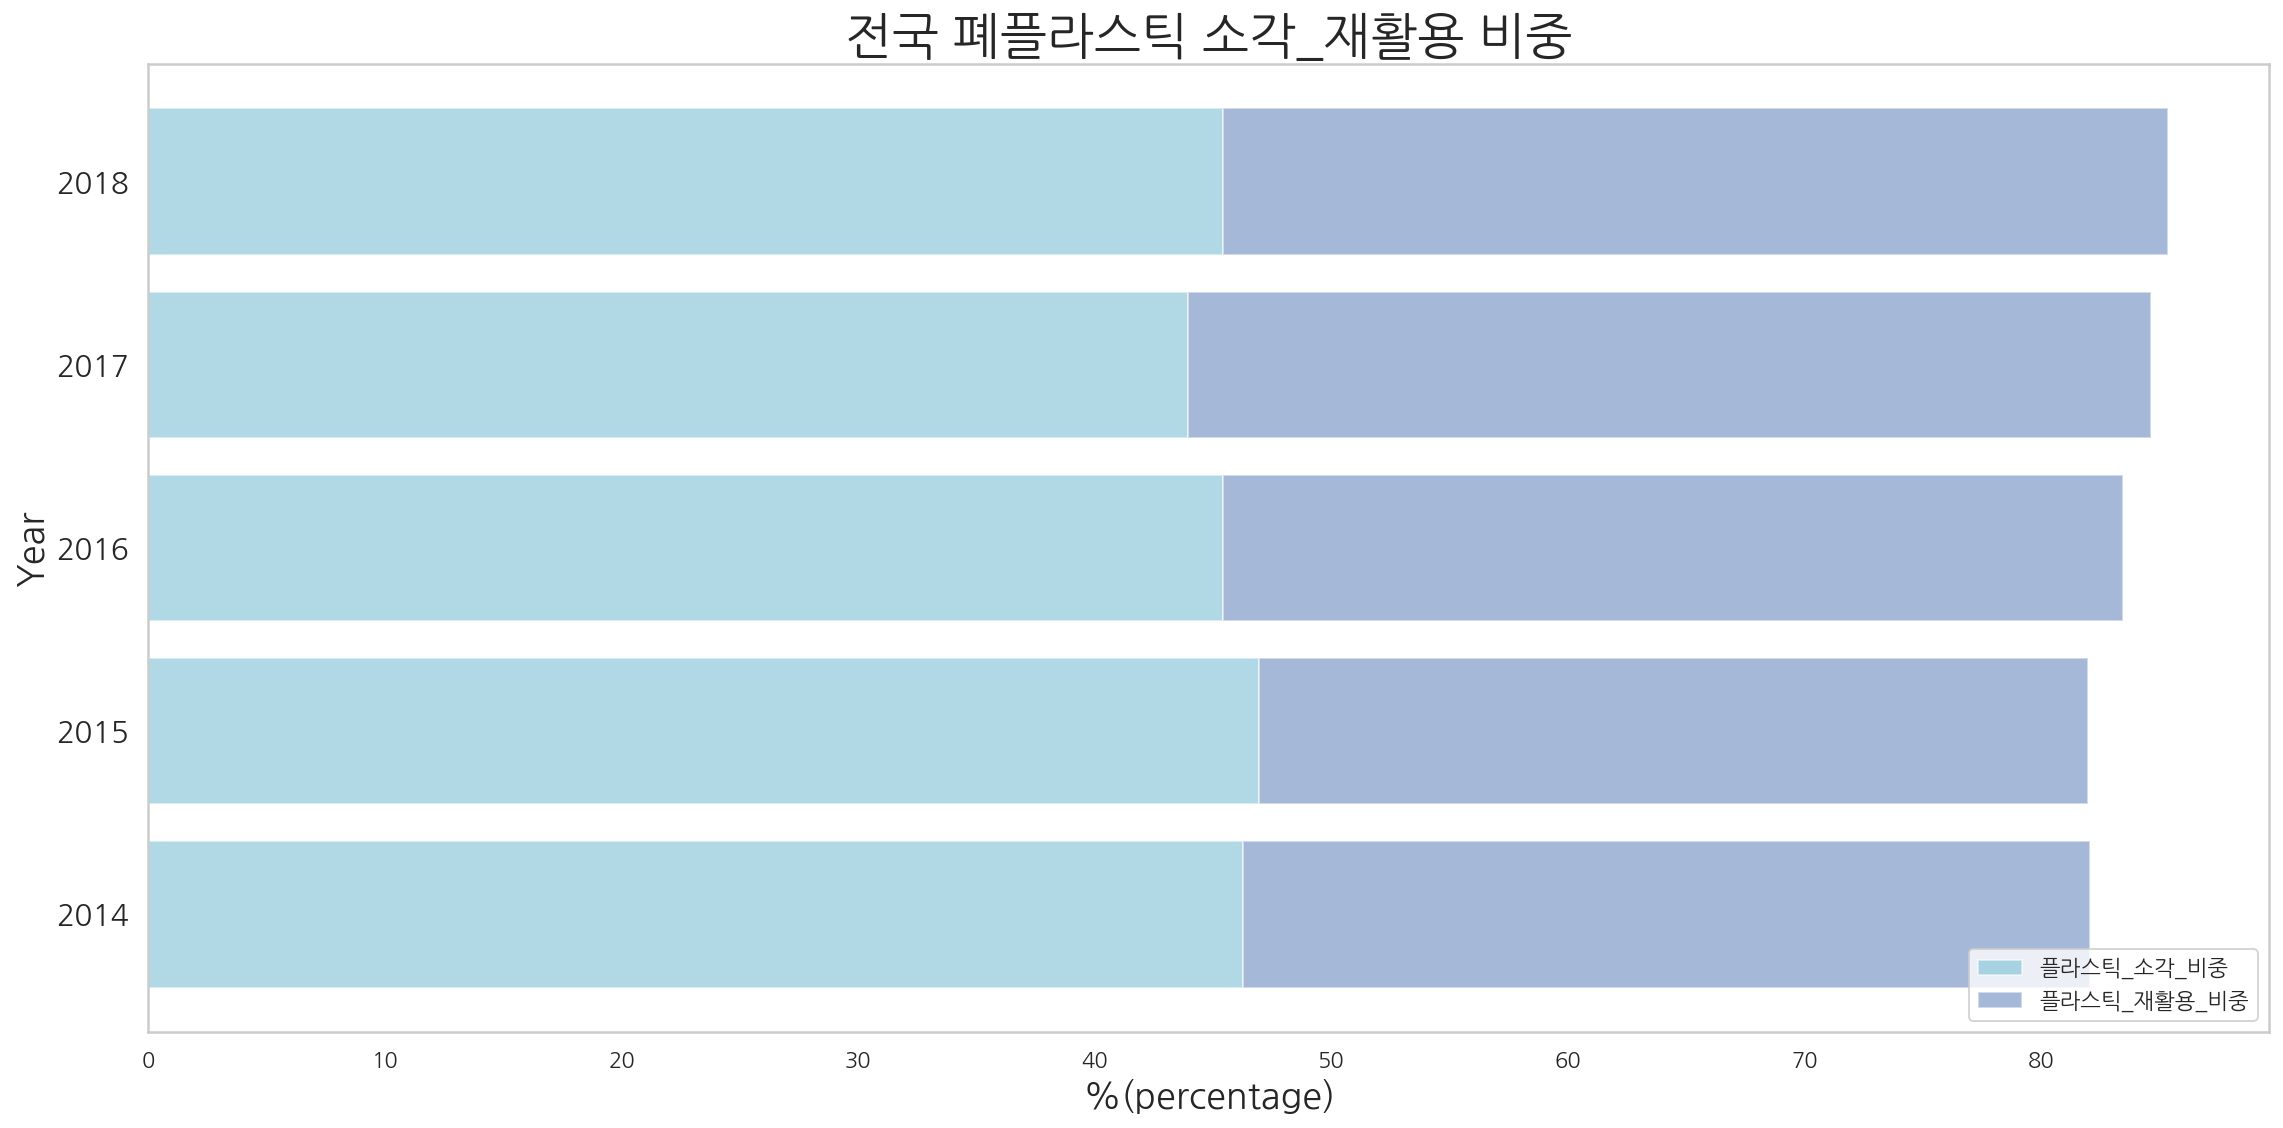

82.06114492615202

In [274]:
total_plastic_disposal_percentage.plt_plastic_percentage("전국")

### 5) 서울 폐플라스틱 소각, 재활용 비중

In [275]:
seoul_plastic_disposal_percentage = Plastic_disposal("Final_Plastic_Disposal")

In [277]:
seoul_plastic_disposal_percentage.incineration_recycle_percentage(4,7)

,플라스틱_소각_비중,플라스틱_재활용_비중
연도,,
2014,37.882434,52.028188
2015,40.645789,46.973876
2016,40.361263,46.766849
2017,44.957933,43.393767
2018,45.657402,38.014431


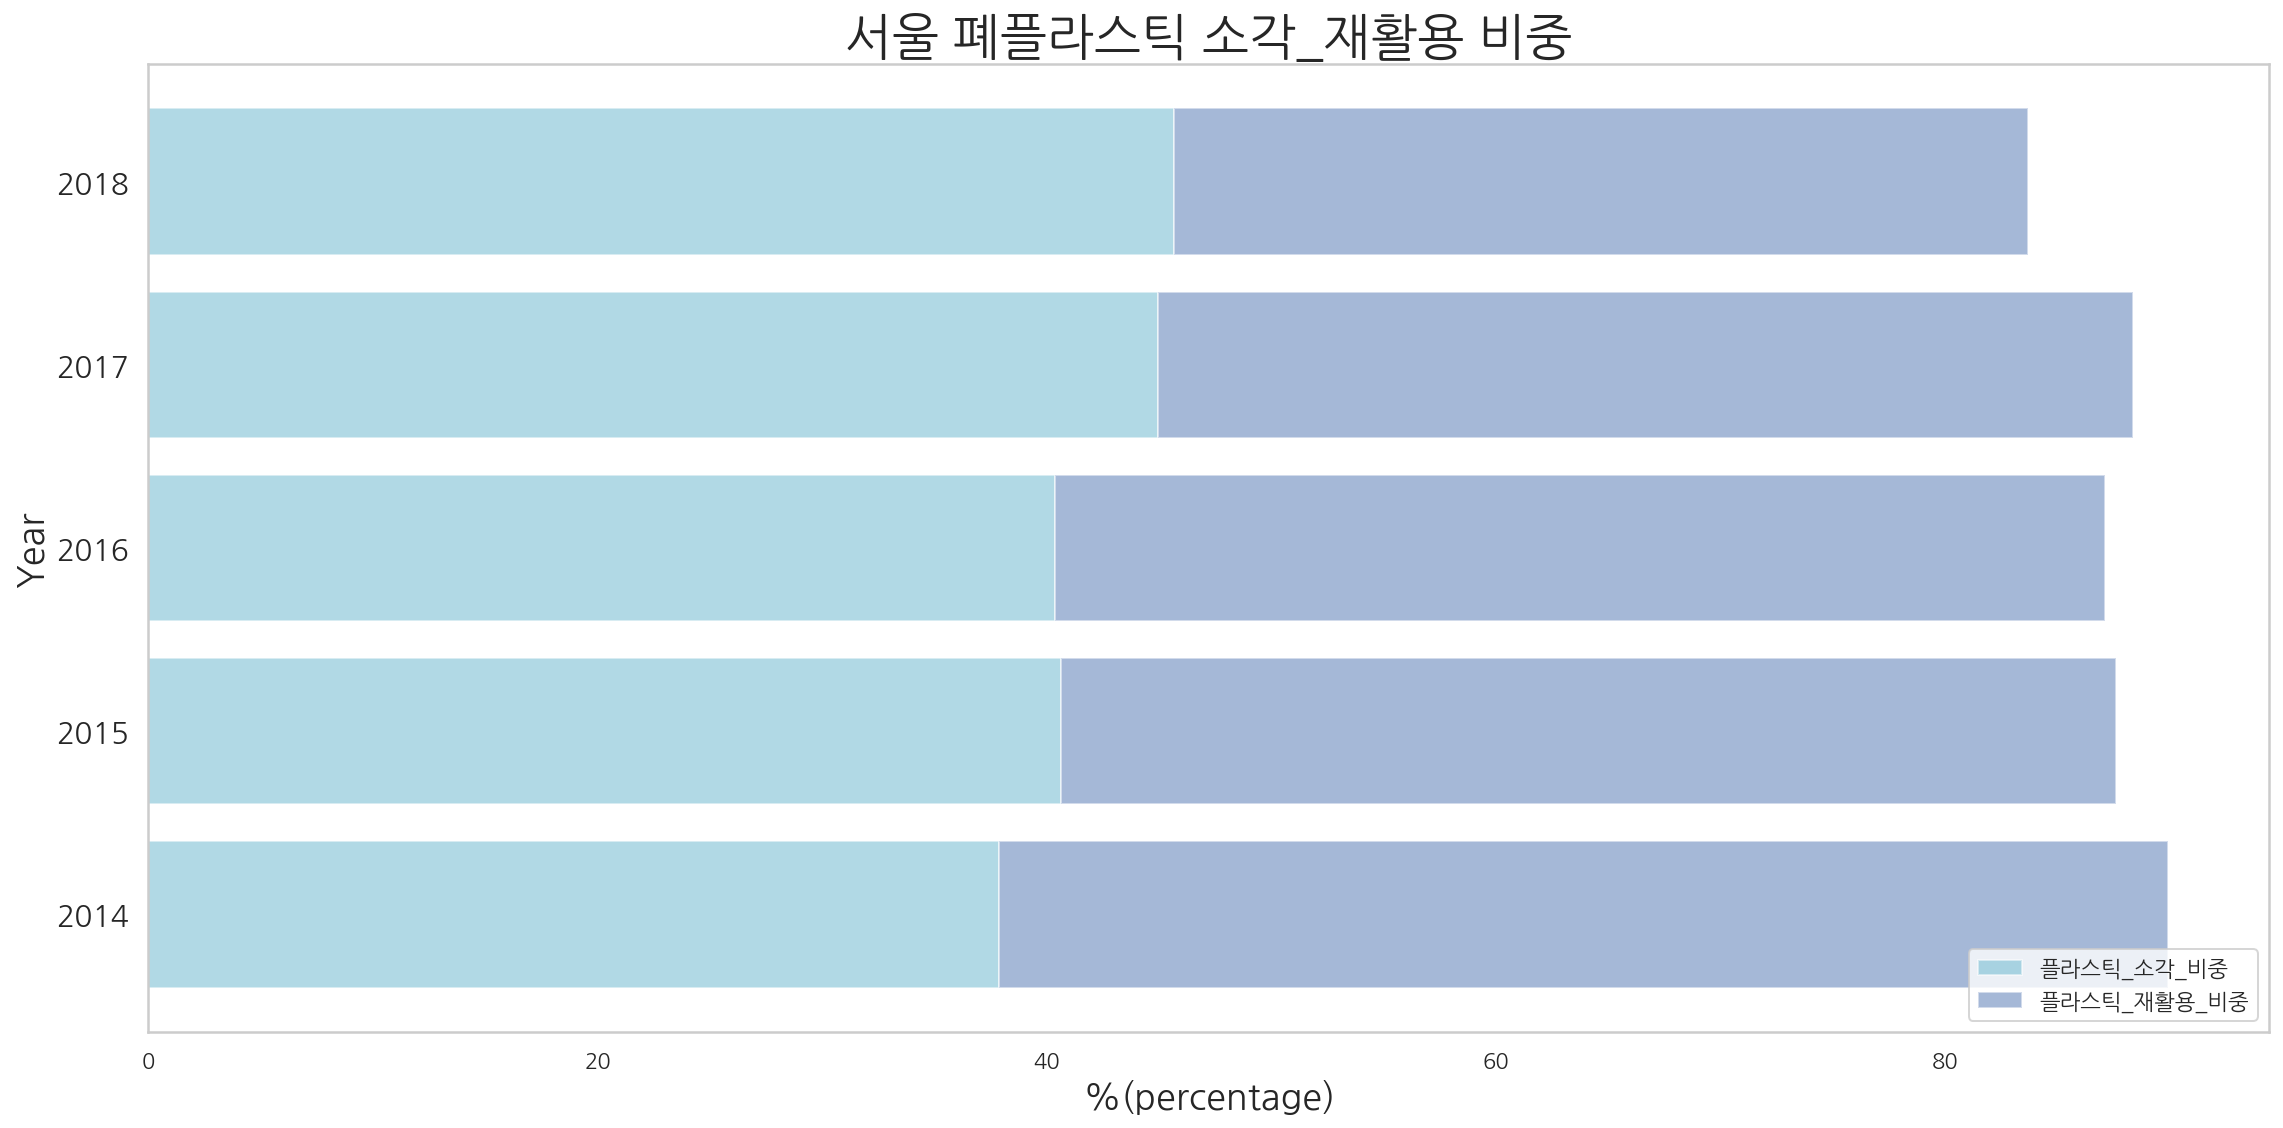

89.91062220694397

In [279]:
seoul_plastic_disposal_percentage.plt_plastic_percentage("서울")

In [280]:
### 6) 대구 폐플라스틱 소각, 재활용 비중

In [281]:
daegu_plastic_disposal_percentage = Plastic_disposal("Final_Plastic_Disposal")

In [282]:
daegu_plastic_disposal_percentage.incineration_recycle_percentage(108,111)

,플라스틱_소각_비중,플라스틱_재활용_비중
연도,,
2014,18.462886,27.525347
2015,19.483315,23.977395
2016,14.806763,52.971014
2017,12.568991,69.944807
2018,12.592216,67.514627


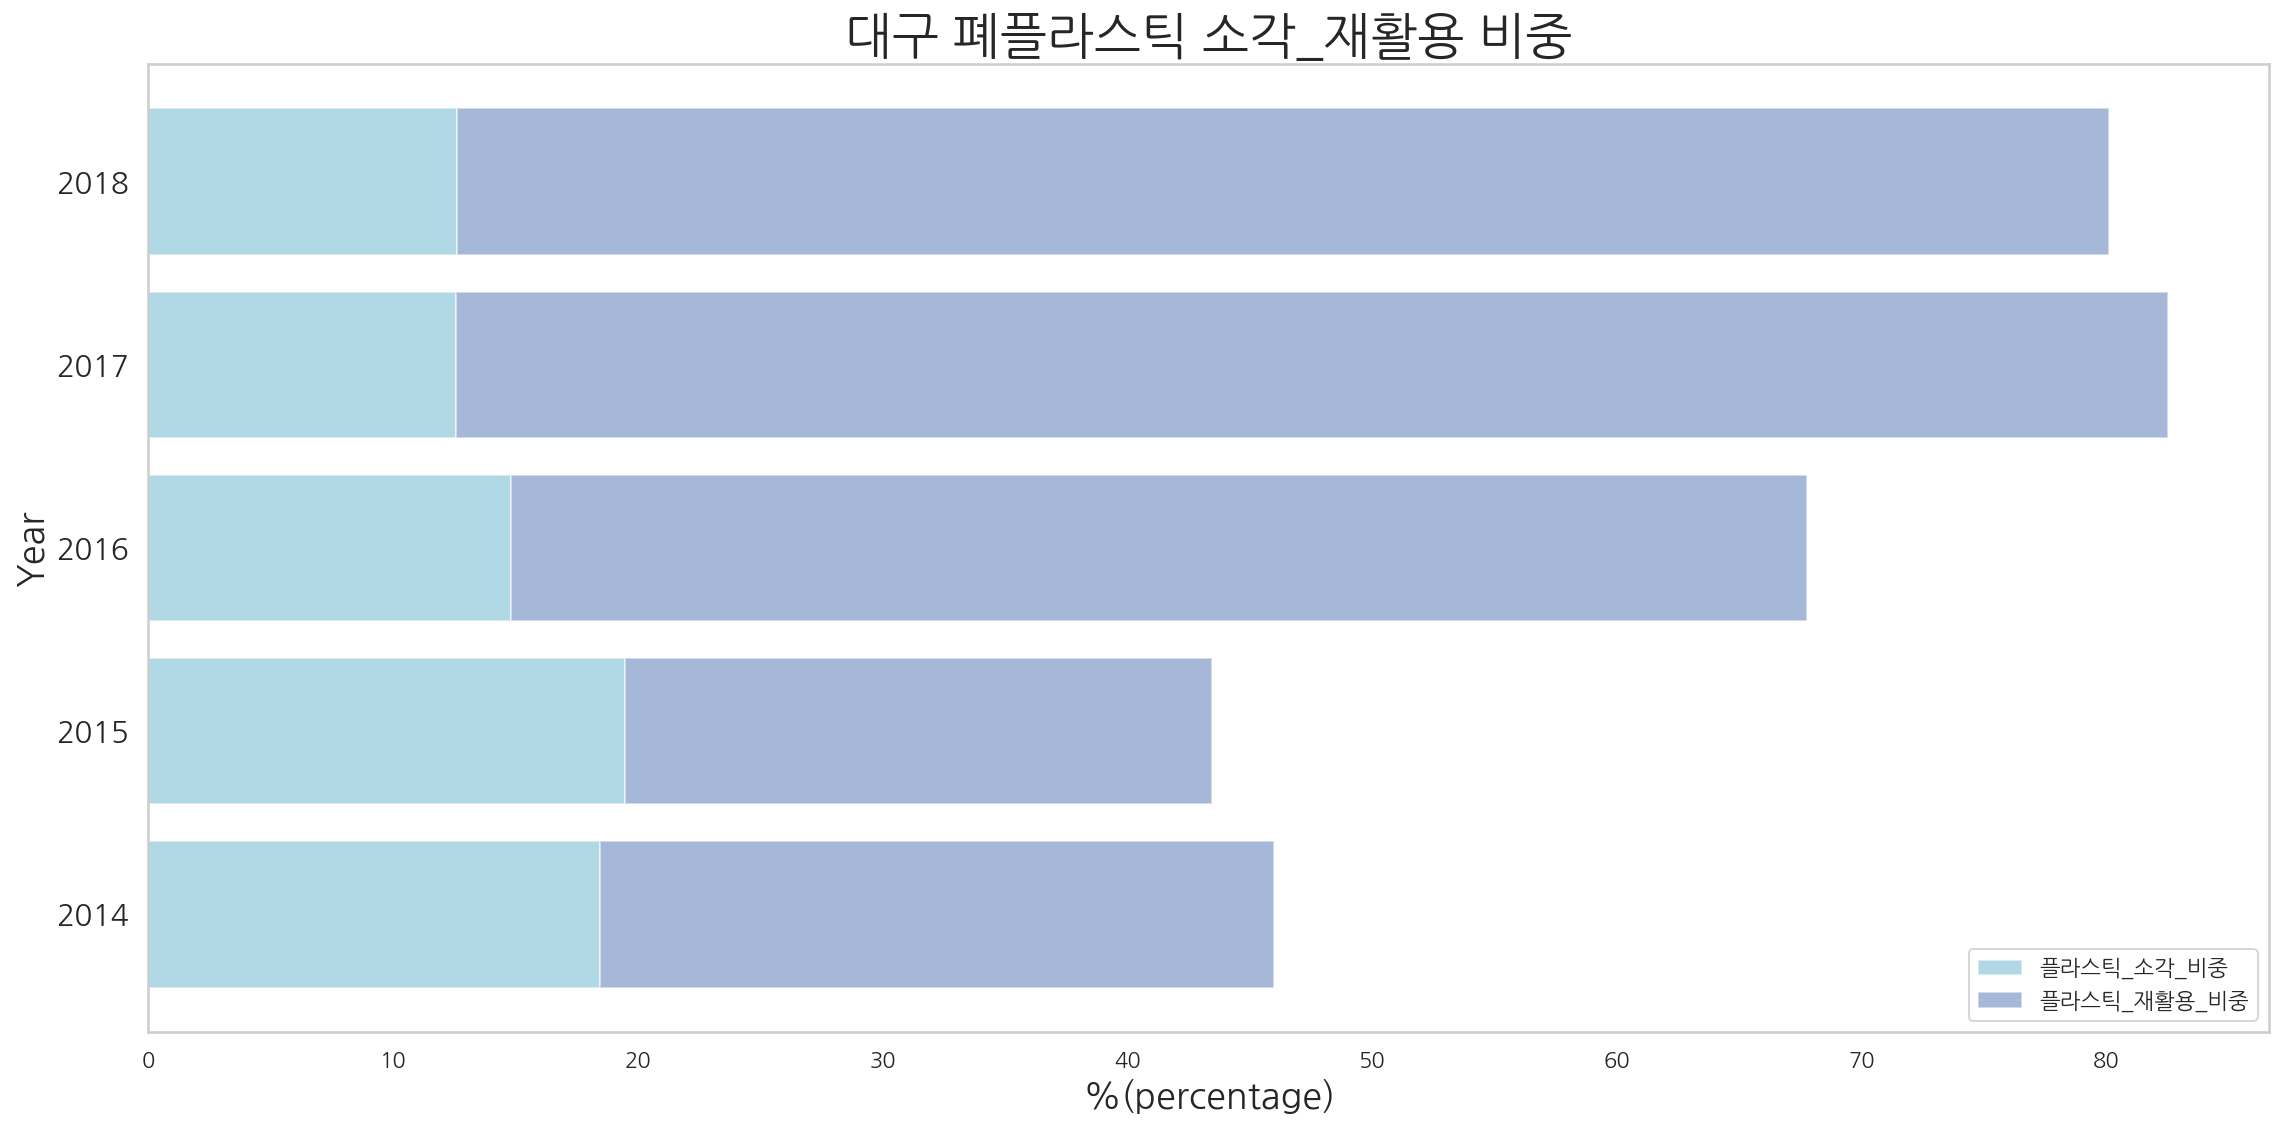

45.98823382150458

In [283]:
daegu_plastic_disposal_percentage.plt_plastic_percentage("대구")